# ASTR3005 Code

[Setup](#setup)

[SNR](#SNR)

[SuperFit](#SuperFit)

[SNID](#SNID)

[Combination](#Combination)

[Uniformity Analysis](#Uniformity_Analysis)

## Setup

In [2]:
print("Additional opertations")

# Set paths
main_path = './'
dat_path = './SN Data/'
csv_path = './SN Data CSV/'

snr_path = './SNR Data/'
cut_snr_path = './Cut SNR Data/'
w_snr_path = './Weighted SNR Data/'
b_snr_path = './Binned SNR Data/'

sf_path = './SN SF Analysis/'
sf_pdf_path = './SF PDFs/'
sf_img_path = './SF Images/'

final_path = './Compressed/'

snid_path = './SNID/info/'
snid_st_path = './SNID/SNID Subtypes/'
snid_obj_path = './SNID/SNID Objects/'

Additional opertations


In [3]:
# File Operations

from os import listdir
from os.path import isfile, join
import csv

In [4]:
# Standard Plotting and Maths

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

In [5]:
# Extra modules

#from natsort import natsorted
import copy
import ast

In [6]:
def void(argument):
    return

In [7]:
# PDF and Image management
from matplotlib import image as mpimg
from pdf2image import convert_from_path

### Check the folder length for SNID

In [90]:
# Check the length of each folder

dir_list = [
    './SN Data/',
    './SN Data CSV/',
    './SNR Data/',
    './Cut SNR Data/',
    './Weighted SNR Data/',
    './Binned SNR Data/',
    './SN SF Analysis/',
    './Compressed/',
    './SNID/info/',
    './SNID/SNID Subtypes/',
    './SNID/SNID Objects/'
]

for i in dir_list:
    print(len([f for f in listdir(i) if isfile(join(i, f))]))

snid_files = [f for f in listdir('./SNID/info/') if isfile(join('./SNID/info/', f))]
sn_data_files = [f for f in listdir('./SN Data/') if isfile(join('./SN Data/', f))]

snid_files = list(map(lambda x: x[:-12], snid_files))
sn_data_files = list(map(lambda x: x[:-4], sn_data_files))

print(len(snid_files)-len(sn_data_files))

print(len(list(set(snid_files)))-len(list(set(sn_data_files))))

difference_result = list(set(sn_data_files) - set(snid_files))

print(difference_result)
print(len(difference_result))

75
76
76
76
76
12
76
1
76
76
75
1
1
[]
0


### .dat files to .csv

In [3]:
# Read all files in Brad's directory
dat_files = [f for f in listdir(dat_path) if isfile(join(dat_path, f))]

# List to collect all metadata
metadata = [['file', 'date', 'time', 'pipeline', 'metadata']]

for file in dat_files:
    # Grab file name with no extension
    file_name = file[:-4]
    
    # Read dat to a list of lists
    dat_content = [i.strip().split() for i in open(dat_path+file).readlines()]
    
    # Pull metadata
    metadata.append([file_name, dat_content[2][2][:-1], dat_content[2][3], dat_content[3][4], dat_content[4][3]])

    # Process dat by clearing header lines
    dat_content = dat_content[6:]
    dat_content[0] = dat_content[0][1:]

    # Write it as a new CSV file
    with open(csv_path+file_name+'.csv', "w+") as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerows(dat_content)
    
with open(csv_path+'key.csv', "w+") as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(metadata)

print("Transfer complete")

Transfer complete


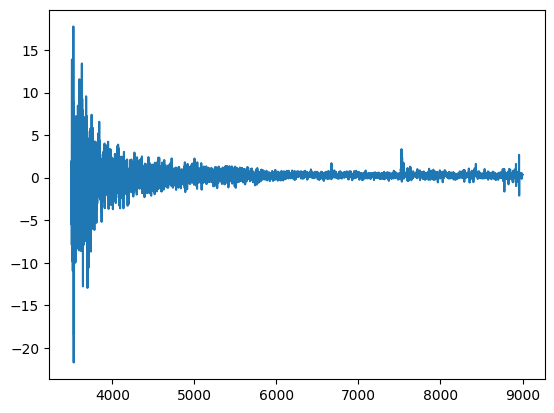

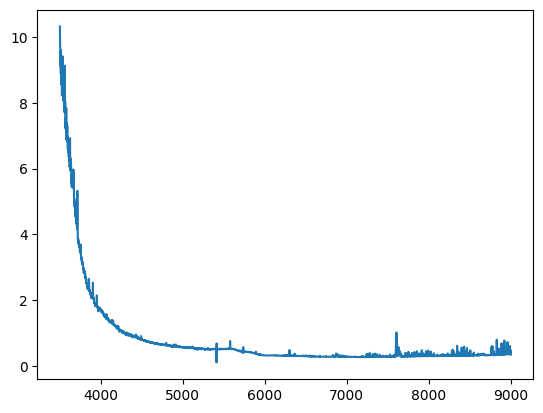

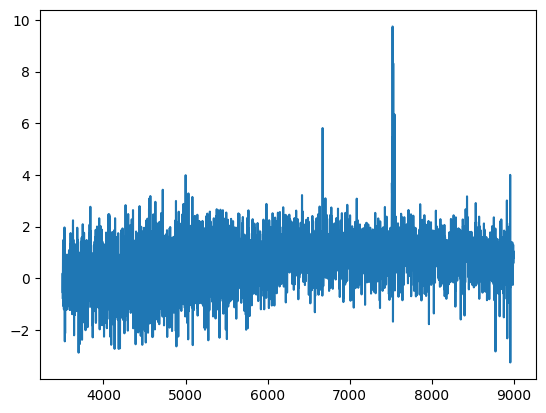

,Wavelength,Flux,Error
0,3502.32,-7.80450,10.32100
1,3503.10,1.97750,10.09000
2,3503.87,-4.22230,10.24900
3,3504.65,-5.51250,9.77120
4,3505.42,1.99970,9.70220
...,...,...,...
7090,8995.78,0.20815,0.35767
7091,8996.56,0.32870,0.32849
7092,8997.33,0.39525,0.37534
7093,8998.11,0.36776,0.42587


In [160]:
# Plot basic spectra and error

sample = pd.read_csv(csv_path+"OBK-11968-WiFeS-Splice-UT20220613T192020-4.p12_SN.csv") #"./SN Data CSV/key.csv")

plt.plot(sample['Wavelength'],sample['Flux']) #, yerr=sample['Error'], fmt="ko")
plt.show()
plt.plot(sample['Wavelength'],sample['Error'])
plt.show()
plt.plot(sample['Wavelength'],sample['Flux']/sample['Error'])
plt.show()

sample

In [7]:
# Returns an upper and lower index range for a given spectra between two lambda points
def cut_spectra(spectra, lower=0, upper=0):
    lower_index = 0
    upper_index = len(spectra)
    if lower != 0:
        lower_index = find_first_index(spectra, lower)
    if upper != 0:
        upper_index = find_first_index(spectra, upper)
    return lower_index, upper_index-1
        
# Finds the first index of values above a specific lambda
# If index is not found, return the size of the array (an invalid index point)
def find_first_index(spectra, lam):
    index = 0
    for l in spectra:
        if l > lam:
            return index
        index+=1
    try:
        return len(spectra['Wavelength'])
    except:
        print(len(spectra))
        return len(spectra)
        

# Plot zoomed in spectra around some expected Si II lines
# Si II at 4120 - 5670 ... https://physics.nist.gov/PhysRefData/Handbook/Tables/silicontable2.htm

l, u = cut_spectra(sample['Wavelength'], 4120, 4140)

plt.plot(sample['Wavelength'][l:u],sample['Flux'][l:u])
plt.show()

NameError: name 'sample' is not defined

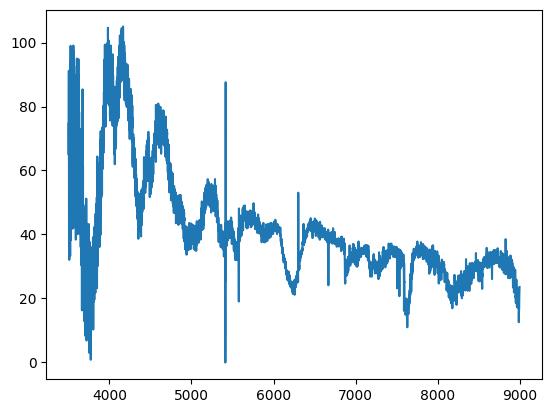

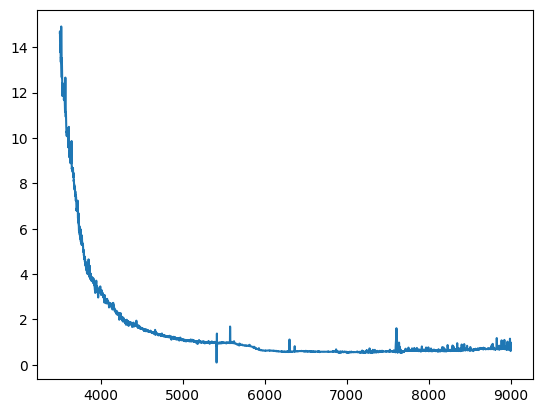

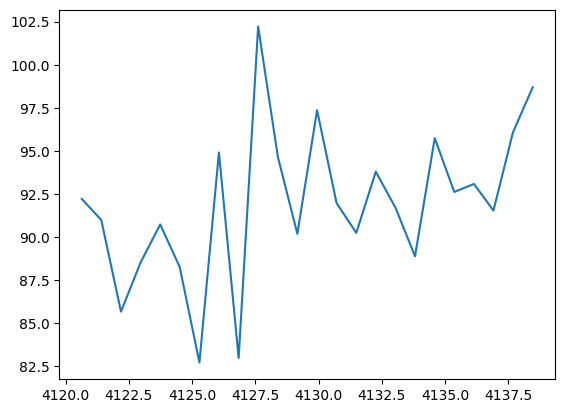

In [8]:
# Do the whole process again but with a different spectra
sample2 = pd.read_csv(csv_path+"T2m3ws-20230106.103716-0035.p12_SN.csv")
plt.plot(sample2['Wavelength'],sample2['Flux'])
plt.show()
plt.plot(sample2['Wavelength'],sample2['Error'])
plt.show()
l, u = cut_spectra(sample2['Wavelength'], 4120, 4140)
plt.plot(sample2['Wavelength'][l:u],sample2['Flux'][l:u])
plt.show()

<Figure size 640x480 with 0 Axes>

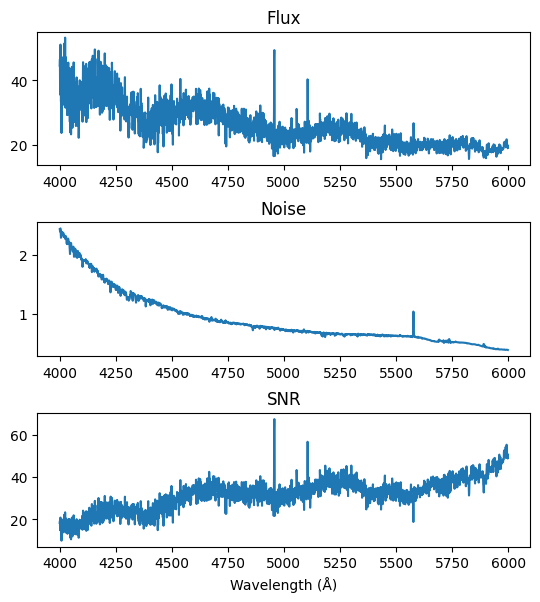

In [105]:
def display_spectra(file_name, cut_lower=0, cut_upper=0, figsize=(6, 6)):
    sp = pd.read_csv(csv_path+file_name)
    l, u = cut_spectra(sp['Wavelength'], cut_lower, cut_upper)
    
    figure, axis = plt.subplots(3, 1, figsize=figsize)
    plt.tight_layout(pad=2)
    
    axis[0].plot(sp['Wavelength'][l:u],sp['Flux'][l:u])
    axis[0].set_title("Flux")
    axis[1].plot(sp['Wavelength'][l:u],sp['Error'][l:u])
    axis[1].set_title("Noise")
    axis[2].plot(sp['Wavelength'][l:u],sp['Flux'][l:u]/sp['Error'][l:u])
    axis[2].set_title("SNR")
    axis[2].set_xlabel("Wavelength (Å)")

plt.figure(1)
display_spectra("OBK-112832-WiFeS-Splice-UT20221010T114426-8.p12_SN.csv", 4000, 6000)
plt.show()

## SNR

In [12]:
def SNR(signal, noise):
    return signal/noise

def SNR_avg(signal, noise):
    return np.mean(signal/noise)

def SNR_sample(sample):
    sample['SNR'] = SNR(sample['Flux'], sample['Error'])
    return sample

In [13]:
SNR_avg(np.array([3, 4]), np.array([4, 4]))

0.875

In [14]:
SNR_sp = SNR_sample(sample)
plt.plot(SNR_sp['Wavelength'],SNR_sp['SNR'])
plt.show()
print(np.mean(SNR_sp['SNR']))

NameError: name 'sample' is not defined

### .dat files to SNR files

#### SNR with no cut-off

In [87]:
# Read all files in Brad's directory
dat_files = [f for f in listdir(dat_path) if isfile(join(dat_path, f))]

# List to collect all metadata
metadata = [['file', 'date', 'time', 'pipeline', 'metadata', 'SNR_mean', 'SNR_median', 'SNR_var']]

for file in dat_files:
    # Grab file name with no extension
    file_name = file[:-4]
    
    # Read dat to a list of lists
    dat_content = [i.strip().split() for i in open(dat_path+file).readlines()]
    
    # Process dat by clearing header lines
    new_dat_content = dat_content[6:]
    new_dat_content[0] = new_dat_content[0][1:]
    new_dat_content[0].append('SNR')
    
    sig_list = []
    
    # Calculate SNRs
    for i in range(1, len(new_dat_content)):
        sig = SNR(float(new_dat_content[i][1]), float(new_dat_content[i][2]))
        sig_list.append(sig)
        new_dat_content[i].append(sig)
        
    sig_list_np = np.array(sig_list)
    
    # Pull metadata
    metadata.append([
        file_name,               # File Name
        dat_content[2][2][:-1],  # Date
        dat_content[2][3],       # Time
        dat_content[3][4],       # Pipeline
        dat_content[4][3],       # Metadata
        np.mean(sig_list_np),    # SNR Mean
        np.median(sig_list_np),  # SNR Median
        np.var(sig_list_np)      # SNR Variance
    ])

    # Write it as a new CSV file
    with open(snr_path+file_name+'.csv', "w+") as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerows(new_dat_content)

with open(snr_path+'key.csv', "w+") as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(metadata)

print("Transfer complete")

Transfer complete


#### SNR with cut-off

Saves to same folder as process above.

In [93]:
# Read all files in Brad's directory
dat_files = [f for f in listdir(dat_path) if isfile(join(dat_path, f))]

# List to collect all metadata
metadata = [['file', 'date', 'time', 'pipeline', 'metadata', 'SNR_mean', 'SNR_median', 'SNR_var']]

for file in dat_files:
    # Grab file name with no extension
    file_name = file[:-4]
    
    # Read dat to a list of lists
    dat_content = [i.strip().split() for i in open(dat_path+file).readlines()]
    
    # Process dat by clearing header lines
    new_dat_content = dat_content[6:]
    new_dat_content[0] = new_dat_content[0][1:]
    new_dat_content[0].append('SNR')
    
    sig_list = []
    # ===== CUT-OFF DATA =====#
    # 5300 is where red band begins 
    start_index = find_first_index(list(map(lambda x: float(x[0]), new_dat_content[1:])), 5300) + 1
    
    # Calculate SNRs
    for i in range(1, len(new_dat_content)):
        sig = SNR(float(new_dat_content[i][1]), float(new_dat_content[i][2]))
        if i >= start_index: sig_list.append(sig)
        new_dat_content[i].append(sig)
        
    sig_list_np = np.array(sig_list)
    
    # Pull metadata
    metadata.append([
        file_name,               # File Name
        dat_content[2][2][:-1],  # Date
        dat_content[2][3],       # Time
        dat_content[3][4],       # Pipeline
        dat_content[4][3],       # Metadata
        np.mean(sig_list_np),    # SNR Mean
        np.median(sig_list_np),  # SNR Median
        np.var(sig_list_np)      # SNR Variance
    ])

    # Write it as a new CSV file
    with open(cut_snr_path+file_name+'.csv', "w+") as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerows(new_dat_content)

with open(cut_snr_path+'key.csv', "w+") as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(metadata)

print("Transfer complete")

Transfer complete


### Outliers and Boxplots of SNR

In [112]:
# Clears outliers from a dataset
def clear_outliers(data, section=''):
    data_section = data
    if section != '':
        data_section = data[section]
    
    # Get the IQR and quartiles
    q75, q25 = np.percentile(data_section, [75 ,25])
    iqr = q75 - q25
    
    # Determine upper and lower bounds
    lower = q25 - (1.5 * iqr)
    upper = q75 + (1.5 * iqr)
    
    # Filter out outliers
    if section != '':
        return data.query(section + ' <= ' + str(upper) + ' and ' + section + ' >= ' + str(lower))
    else:
        return np.array(list(filter(lambda x: x <= upper and x >= lower, data)))

print(clear_outliers(np.array([2,3,4,3,1,8])))

[2 3 4 3 1]


41.87201643997862


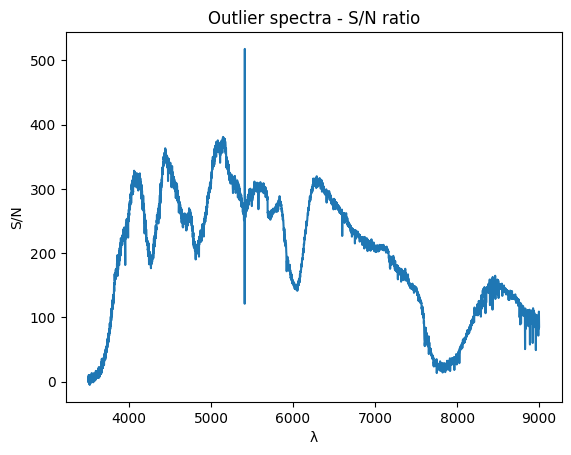

<Figure size 640x480 with 0 Axes>

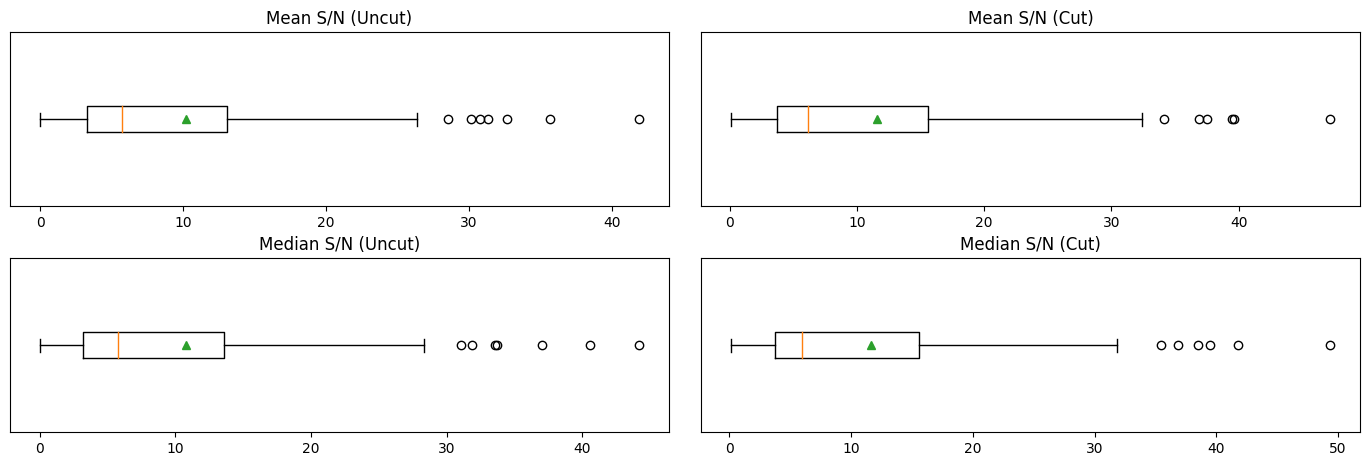

<Figure size 640x480 with 0 Axes>

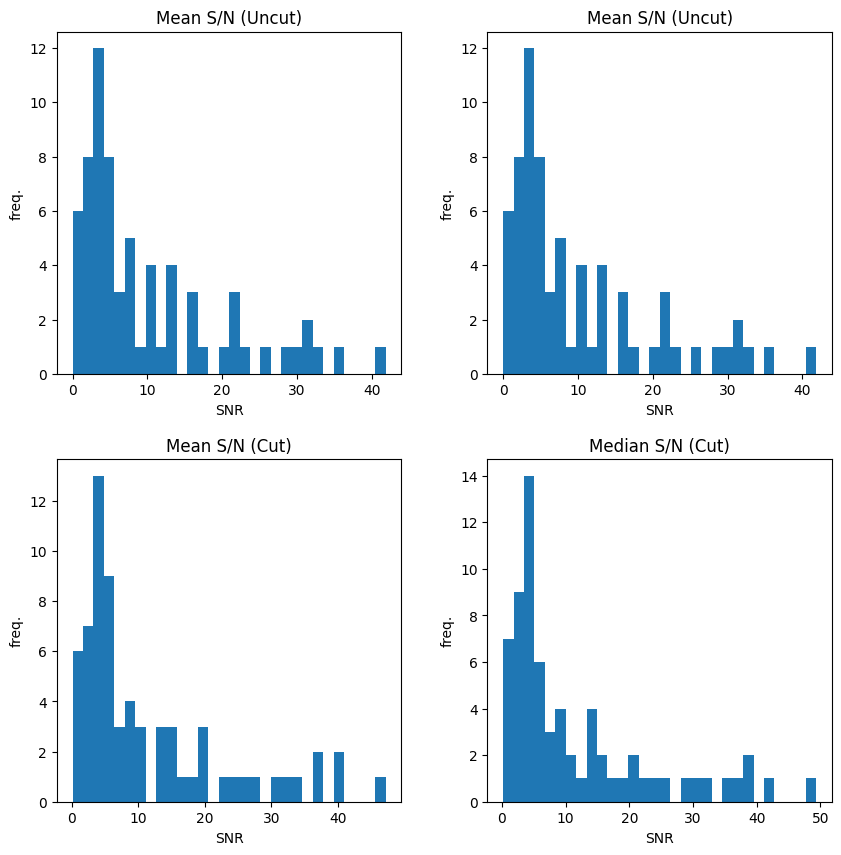

In [26]:
# Plot Data
SNR_sample = pd.read_csv(snr_path+"T2m3ws-20211115.125303-0067.p12_SN.csv")
SNR_key = pd.read_csv(snr_path+"key.csv")
SNR_key_cut = pd.read_csv(cut_snr_path+"key.csv")

filtered_SNR_key = clear_outliers(SNR_key, 'SNR_mean')
filtered_SNR_key_cut = clear_outliers(SNR_key_cut, 'SNR_mean')

print(np.max(filtered_SNR_key['SNR_mean']))

plt.figure(3)
plt.xlabel('λ')
plt.ylabel('S/N')
plt.title("Outlier spectra - S/N ratio")
plt.plot(SNR_sample['Wavelength'], SNR_sample['SNR'])
#plt.savefig('../Report Images/outlier_spectra_SNR')
plt.show()

#plt.figure(1)
#figure, axis = plt.subplots(1, 2)
#plt.tight_layout(pad=2)

#axis[0].set_xlabel('mean x')
#axis[0].set_ylabel('σ')

#axis[0].plot(filtered_SNR_key['SNR_mean'], filtered_SNR_key['SNR_var'], 'o', color='black')
#plt.savefig('../Report Images/uncut_mean-var_graph')
#plt.show()

#axis[1].set_xlabel('mean x')
#axis[1].set_ylabel('σ')
#axis[1].plot(filtered_SNR_key_cut['SNR_mean'], filtered_SNR_key_cut['SNR_var'], 'o', color='black')
#plt.savefig('../Report Images/uncut_mean-var_graph')

#axis[0].set_aspect(1./axis[0].get_data_ratio())
#axis[1].set_aspect(1./axis[1].get_data_ratio())

#axis[0].set_title("Mean v. Variance (Uncut)")
#axis[1].set_title("Mean v. Variance (Cut)")

#plt.savefig('../Report Images/mean-var_graph')

#plt.show()

plt.figure(2)
figure, axis = plt.subplots(2, 2, figsize=(20, 5),
                       gridspec_kw={
                           'width_ratios': [3, 3],
                           'height_ratios': [3, 3],
                           'wspace': 0.05,
                           'hspace': 0.3})
#plt.tight_layout()#pad=1.5)
#figure.set_figwidth(10)

axis[0, 0].boxplot(filtered_SNR_key['SNR_mean'], vert=False, showmeans=True)
axis[0, 0].yaxis.set_major_locator(plt.NullLocator())
#axis[0, 0].tight_layout(pad=10)
axis[0, 0].set_title("Mean S/N (Uncut)")
#plt.savefig('../Report Images/uncut_mean')
#plt.show()

axis[0, 1].boxplot(filtered_SNR_key_cut['SNR_mean'], vert=False, showmeans=True)
axis[0, 1].yaxis.set_major_locator(plt.NullLocator())
#axis[0, 1].tight_layout(pad=10)
axis[0, 1].set_title("Mean S/N (Cut)")

axis[1, 0].boxplot(filtered_SNR_key['SNR_median'], vert=False, showmeans=True)
axis[1, 0].yaxis.set_major_locator(plt.NullLocator())
#axis[1, 0].tight_layout(pad=10)
axis[1, 0].set_title("Median S/N (Uncut)")
#plt.savefig('../Report Images/uncut_median')
#plt.show()

axis[1, 1].boxplot(filtered_SNR_key_cut['SNR_median'], vert=False, showmeans=True)
axis[1, 1].yaxis.set_major_locator(plt.NullLocator())
#axis[1, 1].tight_layout(pad=10)
axis[1, 1].set_title("Median S/N (Cut)")

#axis[2, 0].boxplot(filtered_SNR_key['SNR_var'], vert=False, showmeans=True)
#axis[2, 0].yaxis.set_major_locator(plt.NullLocator())
#axis[2, 0].tight_layout(pad=10)
#axis[2, 0].set_title("Variance in S/N (Uncut)")
#plt.savefig('../Report Images/uncut_var')

#axis[2, 1].boxplot(filtered_SNR_key['SNR_var'], vert=False, showmeans=True)
#axis[2, 1].yaxis.set_major_locator(plt.NullLocator())
#axis[2, 1].tight_layout(pad=10)
#axis[2, 1].set_title("Variance in S/N (Cut)")
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
#plt.savefig('../Report Images/SNR_boxplots')

plt.show()

plt.figure(3)
figure, axis = plt.subplots(2, 2, figsize=(10, 10),
                       gridspec_kw={
                           'width_ratios': [3, 3],
                           'height_ratios': [3, 3],
                           'wspace': 0.25,
                           'hspace': 0.25})

axis[0, 0].set_xlabel('SNR')
axis[0, 0].set_ylabel('freq.')
axis[0, 0].hist(filtered_SNR_key['SNR_mean'], bins=30)
axis[0, 0].set_title("Mean S/N (Uncut)")

axis[1, 0].set_xlabel('SNR')
axis[1, 0].set_ylabel('freq.')
axis[1, 0].hist(filtered_SNR_key_cut['SNR_mean'], bins=30)
axis[1, 0].set_title("Mean S/N (Cut)")

axis[0, 1].set_xlabel('SNR')
axis[0, 1].set_ylabel('freq.')
axis[0, 1].hist(filtered_SNR_key['SNR_mean'], bins=30)
axis[0, 1].set_title("Mean S/N (Uncut)")

axis[1, 1].set_xlabel('SNR')
axis[1, 1].set_ylabel('freq.')
axis[1, 1].hist(filtered_SNR_key_cut['SNR_median'], bins=30)
axis[1, 1].set_title("Median S/N (Cut)")

#plt.savefig('../Report Images/SNR_histograms')
plt.show()

In [11]:
print(np.mean(filtered_SNR_key['SNR_mean']))
print(np.median(filtered_SNR_key['SNR_mean']))
print(np.mean(filtered_SNR_key_cut['SNR_mean']))
print(np.median(filtered_SNR_key_cut['SNR_mean']))

10.180365121694972
5.7469734246035005
11.589237475440363
6.1583927914801135


### Weighted Arithmetic Mean

In [96]:
# Get Data
SNR_key = pd.read_csv(snr_path+"key.csv")

weights = 1/SNR_key['SNR_var']

WAM = np.sum(SNR_key['SNR_mean']*weights)/np.sum(weights)
WAM_var = 1/np.sum(weights)

print(WAM)
print(WAM_var)

2.5471726778444754
0.06218272364558775


Uncut WAM: 2.5471726778444754

Uncut Sig: 0.06218272364558775

Cut WAM: 3.4918580133526538

Cut Sig: 0.05079773553275611

In [158]:
gal = [[2, 3, 4], [3, 4, 4], [1, 1, 1]]

gal = np.array(gal)

gal = gal[:, np.newaxis, :]

print(gal)

[[[2 3 4]]

 [[3 4 4]]

 [[1 1 1]]]


### Weighted SNR

#### .dat to weighted SNR

In [23]:
# Read all files in Brad's directory
dat_files = [f for f in listdir(dat_path) if isfile(join(dat_path, f))]

# List to collect all metadata
metadata = [['file', 'date', 'time', 'pipeline', 'metadata', 'SNR_mean', 'SNR_median', 'SNR_var']]

for file in dat_files:
    # Grab file name with no extension
    file_name = file[:-4]
    
    # Read dat to a list of lists
    dat_content = [i.strip().split() for i in open(dat_path+file).readlines()]
    
    # Process dat by clearing header lines
    new_dat_content = dat_content[6:]
    new_dat_content[0] = new_dat_content[0][1:]
    new_dat_content[0].append('SNR')
    
    sig_list = []
    uncertainty = []
    
    # Calculate SNRs
    for i in range(1, len(new_dat_content)):
        sig = SNR(float(new_dat_content[i][1]), float(new_dat_content[i][2]))
        sig_list.append(sig)
        new_dat_content[i].append(sig)
        uncertainty.append(float(new_dat_content[i][2]))
        
    sig_list_np = np.array(sig_list)
    uncertainty = np.array(uncertainty)
    
    # Perform a Weighted Arithmetic Mean
    weights = 1/uncertainty
    WAM = np.sum(sig_list_np*weights)/np.sum(weights)
    WAM_var = 1/np.sum(weights)
    
    # Pull metadata
    metadata.append([
        file_name,               # File Name
        dat_content[2][2][:-1],  # Date
        dat_content[2][3],       # Time
        dat_content[3][4],       # Pipeline
        dat_content[4][3],       # Metadata
        WAM,                     # SNR Mean
        np.median(sig_list_np),  # SNR Median
        np.var(sig_list_np)      # SNR Variance
    ])

    # Write it as a new CSV file
    with open(w_snr_path+file_name+'.csv', "w+") as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerows(new_dat_content)

with open(w_snr_path+'key.csv', "w+") as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(metadata)

print("Transfer complete")

Transfer complete


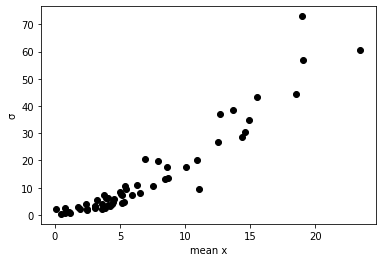

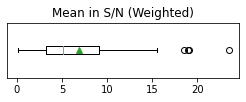

In [24]:
# Plot Data
SNR_sample = pd.read_csv(snr_path+"T2m3ws-20211115.125303-0067.p12_SN.csv")
SNR_key = pd.read_csv(w_snr_path+"key.csv")

filtered_SNR_key = clear_outliers(clear_outliers(SNR_key, 'SNR_mean'), 'SNR_var')

#print(np.max(filtered_SNR_key['SNR_mean']))

plt.xlabel('mean x')
plt.ylabel('σ')
plt.plot(filtered_SNR_key['SNR_mean'], filtered_SNR_key['SNR_var'], 'o', color='black')
plt.show()

plt.boxplot(filtered_SNR_key['SNR_mean'], vert=False, showmeans=True)
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.title("Mean in S/N (Weighted)")
plt.tight_layout(pad=10)
plt.show()

In [25]:
# Get Data
SNR_key = pd.read_csv(w_snr_path+"key.csv")
SNR_key = clear_outliers(SNR_key, 'SNR_mean')

weights = 1/SNR_key['SNR_var']

WAM = np.sum(SNR_key['SNR_mean']*weights)/np.sum(weights)
WAM_var = 1/np.sum(weights)

print(WAM)
print(WAM_var)

2.805390441901516
0.06224186073167427


#### .dat to binned SNR

In [87]:
def binned_SNR(bin_size = 10, fourier=False, cut_off=0):
    # Read all files in Brad's directory
    dat_files = [f for f in listdir(dat_path) if isfile(join(dat_path, f))]

    # List to collect all metadata
    metadata = [['file', 'date', 'time', 'pipeline', 'metadata', 'SNR_mean', 'SNR_median', 'SNR_var']]

    for file in dat_files:
        # Grab file name with no extension
        file_name = file[:-4]
    
        # Read dat to a list of lists
        dat_content = [i.strip().split() for i in open(dat_path+file).readlines()]
    
        # Process dat by clearing header lines
        new_dat_content = dat_content[6:]
        new_dat_content[0] = new_dat_content[0][1:]
        new_dat_content[0].append('SNR')
    
        sig_list = []
        
        step = 1 if fourier else bin_size
        
        # 5300 is where red band begins 
        start_index = find_first_index(list(map(lambda x: float(x[0]), new_dat_content[1:])), cut_off) + 1 if bool(cut_off) else 1
    
        # Calculate SNRs
        for i in range(1, len(new_dat_content)-bin_size+1, step):
            # Grab surrounding (bin_size) values
            content_bin = {'signal' : [], 'noise' : []}
        
            for j in range(bin_size):
                content_bin['signal'].append(float(new_dat_content[i+j][1]))
                content_bin['noise'].append(float(new_dat_content[i+j][2]))
            
            content_bin = {'signal' : np.array(content_bin['signal']), 'noise' : np.array(content_bin['noise'])}
        
            #print(content_bin)
            
            sig = SNR(np.mean(content_bin['signal']), np.mean(content_bin['noise']))
            if i >= start_index: sig_list.append(sig)
            #new_dat_content[i].append(sig)
        
        sig_list_np = np.array(sig_list)
    
        # Pull metadata
        metadata.append([
            file_name,               # File Name
            dat_content[2][2][:-1],  # Date
            dat_content[2][3],       # Time
            dat_content[3][4],       # Pipeline
            dat_content[4][3],       # Metadata
            np.mean(sig_list_np),    # SNR Mean
            np.median(sig_list_np),  # SNR Median
            np.var(sig_list_np)      # SNR Variance
        ])

        # Write it as a new CSV file
        #with open(w_snr_path+file_name+'.csv', "w+") as f:
        #    writer = csv.writer(f, delimiter=',')
        #    writer.writerows(new_dat_content)

    with open(b_snr_path+'key_'+str(bin_size)+('_fourier' if fourier else '')+('_cut' if cut_off else '')+'.csv', "w+") as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerows(metadata)

    print("Transfer complete for bin size of "+str(bin_size))

# ABCDEFGHIJKLMNOPQRSTUVWXYZ
# 123456789X      123456789X

In [88]:
binned_SNR(1)
binned_SNR()
binned_SNR(50)
binned_SNR(100)
binned_SNR(10, True)
binned_SNR(50, True)
binned_SNR(100, True)

Transfer complete for bin size of 1
Transfer complete for bin size of 10
Transfer complete for bin size of 50
Transfer complete for bin size of 100
Transfer complete for bin size of 10
Transfer complete for bin size of 50
Transfer complete for bin size of 100


In [93]:
binned_SNR(10, True, 5300)
binned_SNR(50, True, 5300)
binned_SNR(100, True, 5300)

Transfer complete for bin size of 10
Transfer complete for bin size of 50
Transfer complete for bin size of 100


In [89]:
def print_boxplot_simple(filename, no_outliers=False):
    print("Data for "+filename)
    # Get Data
    SNR_key = pd.read_csv(filename)
    
    # WAM
    weights = 1/SNR_key['SNR_var']

    WAM = np.sum(SNR_key['SNR_mean']*weights)/np.sum(weights)
    WAM_var = 1/np.sum(weights)

    print("Weighted Arithmetic Mean: "+str(WAM))
    print("Weighted Arithmetic Unc.: "+str(WAM_var))
    
    # Remove Outliers
    if no_outliers: SNR_key = clear_outliers(SNR_key, 'SNR_mean')
    
    # Plot data
    plt.xlabel('mean x')
    plt.ylabel('σ')
    plt.plot(SNR_key['SNR_mean'], SNR_key['SNR_var'], 'o', color='black')
    plt.show()

    plt.boxplot(SNR_key['SNR_mean'], vert=False, showmeans=True)
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.title("Mean in S/N ("+filename+")")
    plt.tight_layout(pad=10)
    plt.show()

Data for ./SNR Data/key.csv
Weighted Arithmetic Mean: 2.5471726778444754
Weighted Arithmetic Unc.: 0.06218272364558775


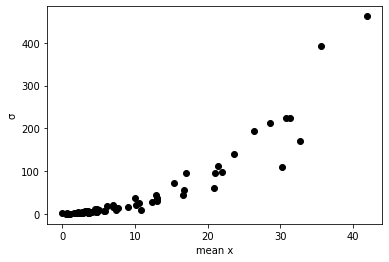

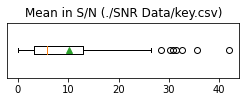

Data for ./Binned SNR Data/key_1.csv
Weighted Arithmetic Mean: 2.5471726778444754
Weighted Arithmetic Unc.: 0.06218272364558775


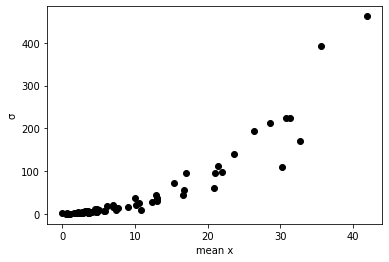

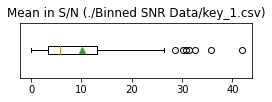

Data for ./Binned SNR Data/key_10.csv
Weighted Arithmetic Mean: 1.960048947970677
Weighted Arithmetic Unc.: 0.03218604555854624


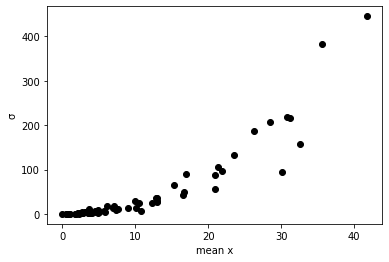

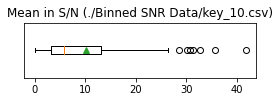

Data for ./Binned SNR Data/key_50.csv
Weighted Arithmetic Mean: 1.5996435997192142
Weighted Arithmetic Unc.: 0.021847199527762783


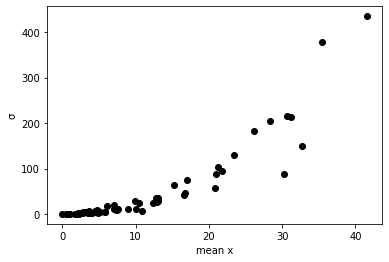

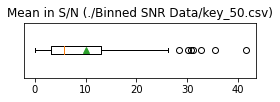

Data for ./Binned SNR Data/key_100.csv
Weighted Arithmetic Mean: 1.4672698316980501
Weighted Arithmetic Unc.: 0.018793408816901055


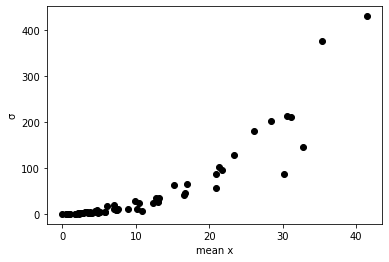

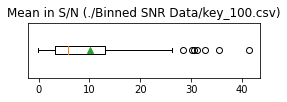

In [90]:
print_boxplot_simple(snr_path+"key.csv", True)
print_boxplot_simple(b_snr_path+"key_1.csv", True)
print_boxplot_simple(b_snr_path+"key_10.csv", True)
print_boxplot_simple(b_snr_path+"key_50.csv", True)
print_boxplot_simple(b_snr_path+"key_100.csv", True)

Data for ./Binned SNR Data/key_10_fourier_cut.csv
Weighted Arithmetic Mean: 2.783720584118099
Weighted Arithmetic Unc.: 0.02603547973829001


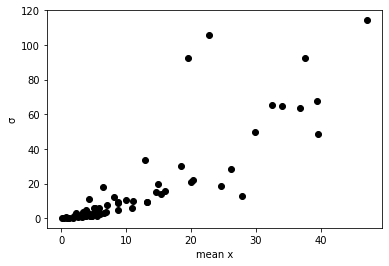

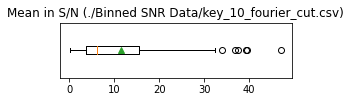

Data for ./Binned SNR Data/key_50_fourier_cut.csv
Weighted Arithmetic Mean: 2.1546234969244433
Weighted Arithmetic Unc.: 0.014957239571651158


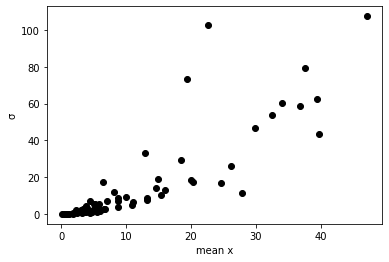

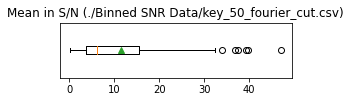

Data for ./Binned SNR Data/key_100_fourier_cut.csv
Weighted Arithmetic Mean: 1.84116918141947
Weighted Arithmetic Unc.: 0.011296953547215997


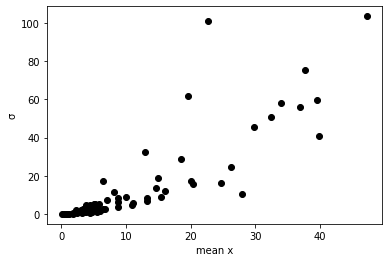

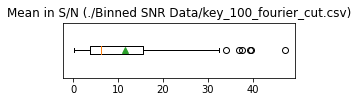

In [94]:
print_boxplot_simple(b_snr_path+"key_10_fourier_cut.csv", True)
print_boxplot_simple(b_snr_path+"key_50_fourier_cut.csv", True)
print_boxplot_simple(b_snr_path+"key_100_fourier_cut.csv", True)

## SuperFit

In [141]:
# Get all files in directory
files = [f for f in listdir(sf_path) if isfile(join(sf_path, f))]

# Define data block
data = []

for file in files:
    # Remove phase data
    if file == "phase_data.csv":
        continue
    
    # Get the big list of data
    data.append(pd.read_csv(sf_path+file))

# Convert into np array
data = np.array(data)

data

<ipython-input-141-28c5da9eeb18>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


array([    Unnamed: 0                                       SPECTRUM GALAXY  \
       0            0  T2m3ws-20211026.131800-0059.p12_SN_binned.txt     S0
       1            1  T2m3ws-20211026.131800-0059.p12_SN_binned.txt    SB1
       2            2  T2m3ws-20211026.131800-0059.p12_SN_binned.txt    SB1
       3            3  T2m3ws-20211026.131800-0059.p12_SN_binned.txt    SB3
       4            4  T2m3ws-20211026.131800-0059.p12_SN_binned.txt     Sb
       5            5  T2m3ws-20211026.131800-0059.p12_SN_binned.txt    SB5
       6            6  T2m3ws-20211026.131800-0059.p12_SN_binned.txt    SB2
       7            7  T2m3ws-20211026.131800-0059.p12_SN_binned.txt    SB4
       8            8  T2m3ws-20211026.131800-0059.p12_SN_binned.txt     Sc
       9            9  T2m3ws-20211026.131800-0059.p12_SN_binned.txt      E
       10          10  T2m3ws-20211026.131800-0059.p12_SN_binned.txt     Sc
       11          11  T2m3ws-20211026.131800-0059.p12_SN_binned.txt      E
       12

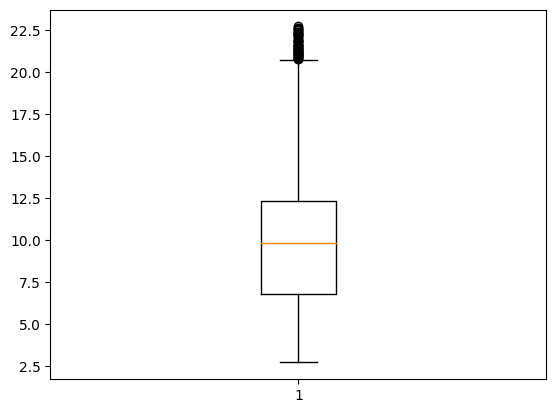

In [142]:
# See a big list of chi-squared values
chi2 = []
for table in data:
    #print(table['CHI2/dof'])
    for chi in table['CHI2/dof']:
        chi2.append(chi)
    
chi2_filtered = clear_outliers(chi2)

plt.boxplot(chi2_filtered)
plt.show()

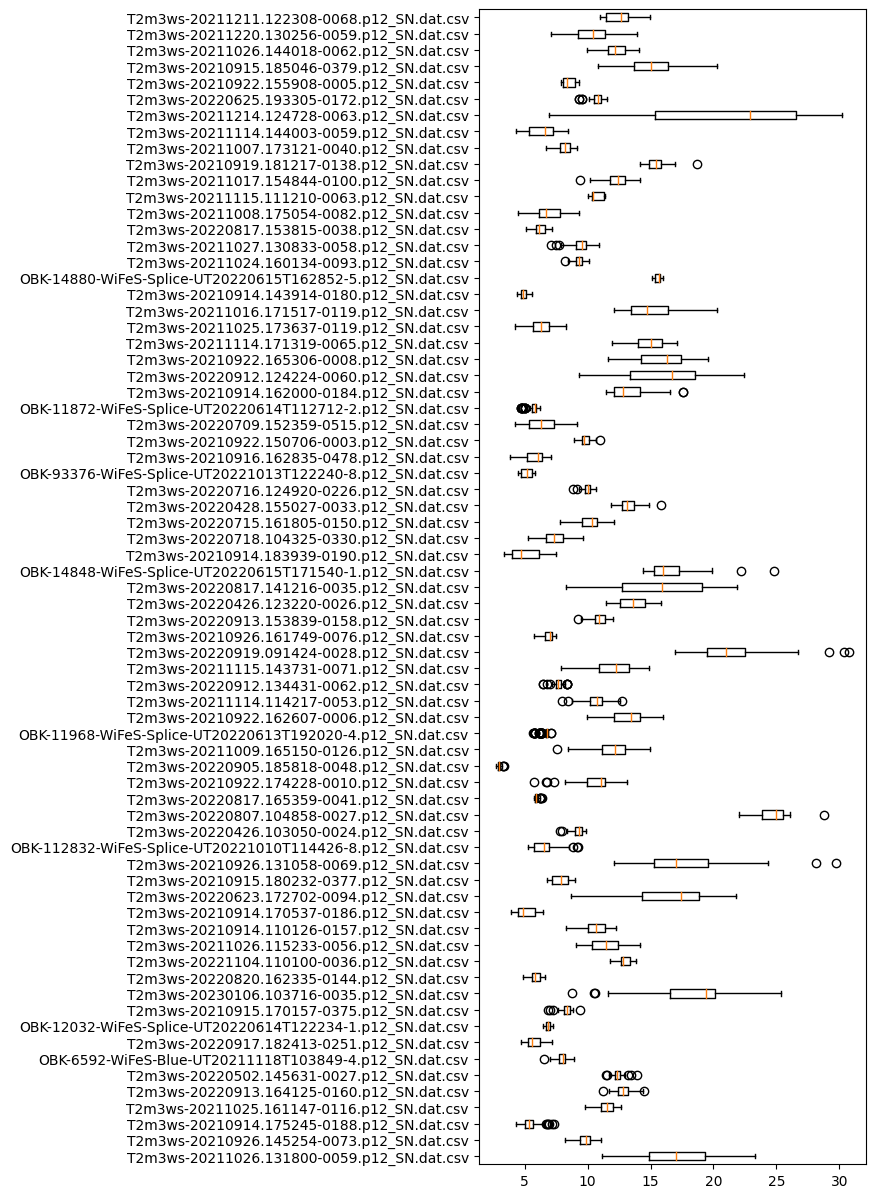

In [143]:
# See a big list of chi-squared values seperated on each 
chi2 = []
for table in data:
    chi2.append(table['CHI2/dof'])
    
#chi2_filtered = clear_outliers(chi2)

# Create an xtick list and remove the phasedata element
xtickrange = list(range(1, len(files)))
filelist = list(files)
phase_index = filelist.index('phase_data.csv')
#xtickrange.pop(phase_index)
filelist.pop(phase_index)

#print(len(list(files)))
#print(len(filelist))

#print(len(range(1, len(files)+1)))
#print(len(xtickrange))

# 25 is the outlier
outliers = [24, 4, 51, 6]
for outlier in outliers:
    chi2.pop(outlier)
    filelist.pop(outlier)
xtickrange = list(range(1, len(files)-len(outliers)))

plt.figure(figsize=(5, 15))
plt.boxplot(chi2, vert=False)
plt.yticks(xtickrange, filelist)

plt.show()

In [144]:
#from natsort import natsorted

# Sort the data
sorted_data = np.array(list(map(lambda d: d.sort_values(by=['CHI2/dof', 'CHI2/dof2']), data)))

# Clip the data
clipped_data = []
for df in sorted_data:
    clipped_data.append(df.head(5))

clipped_data[3]

<ipython-input-144-0cc862ed0f71>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sorted_data = np.array(list(map(lambda d: d.sort_values(by=['CHI2/dof', 'CHI2/dof2']), data)))


,Unnamed: 0,SPECTRUM,GALAXY,SN,CONST_SN,CONST_GAL,Z,A_v,Phase,Band,Frac(SN),Frac(gal),CHI2/dof,CHI2/dof2
3,3,T2m3ws-20211025.161147-0116.p12_SN_binned.txt,Sc,IIb/PS15bgt/AFOSC phase-band : 14.07B,2.032897,0.165847,0.070,2.0,14.07,B,0.660406,0.339594,9.813664,0.019472
39,39,T2m3ws-20211025.161147-0116.p12_SN_binned.txt,S0,SLSN-I/2015bn/IMACS phase-band : 37.34B,0.287017,0.451796,0.088,-2.0,37.34,B,0.805623,0.194377,10.017578,0.021683
14,14,T2m3ws-20211025.161147-0116.p12_SN_binned.txt,Sa,Ia-norm/2009Y/WFCCD phase-band : 43.36B,0.610208,0.327098,0.062,0.0,43.36,B,0.691374,0.308626,10.023167,0.020087
11,11,T2m3ws-20211025.161147-0116.p12_SN_binned.txt,E,Ib/2014C/AFOSC phase-band : -2.87B,0.998381,0.298466,0.066,0.6,-2.87,B,0.722285,0.277715,10.053391,0.019947
28,28,T2m3ws-20211025.161147-0116.p12_SN_binned.txt,Sa,Ic/2019bkc/RSS phase-band : 7.05g,1.184307,0.306898,0.106,0.8,7.05,g,0.676784,0.323216,10.156842,0.020942


In [145]:
# From the clipped data, condense into one data point

# Get the uncertainty and mean in each recorded value
def UnM(arr):
    return (np.mean(arr), np.var(arr))

single_data_list = []
for df in clipped_data:
    #print(list(df['SPECTRUM']))
    single_data_list.append(pd.DataFrame(
        {
            "SPECTRUM": [list(df['SPECTRUM'])[0]],     # All spectrums are the same
            "GALAXY": [list(df['GALAXY'])],            # Compile possible list of galaxy types
            "SN": [list(df['SN'])],                    # Compile possible list of SN types
            "CONST_SN": [UnM(df['CONST_SN'])],         # Uncertainty and Mean in SN Const
            "CONST_GAL": [UnM(df['CONST_GAL'])],       # Uncertainty and Mean in GAL Const
            "Z": [UnM(df['Z'])],                       # Uncertainty and Mean in Redshift
            "A_v": [list(df['A_v'])],                  # Cannot condense A_v
            "Phase": [list(df['Phase'])],              # Cannot condense Phase
            "Band": [list(df['Band'])],                # Cannot condense Band
            "Frac(SN)": [UnM(df['Frac(SN)'])],         # Uncertainty and Mean in Fraction of SN light
            "Frac(gal)": [UnM(df['Frac(gal)'])],       # Uncertainty and Mean in Fraction of gal light
            "CHI2/dof": [UnM(df['CHI2/dof'])],         # Uncertainty and Mean in Reduced Chi2
            "CHI2": [list(df['CHI2/dof'])],            # List of Chi-Squareds
            "CHI2/dof2": [UnM(df['CHI2/dof2'])],       # Uncertainty and Mean in Reduced Chi2
        }
    ))

#single_data_list[0]
    
# Concat into one dataframe
condensed_data = pd.concat(single_data_list, ignore_index=True, sort=False)

condensed_data

,SPECTRUM,GALAXY,SN,CONST_SN,CONST_GAL,Z,A_v,Phase,Band,Frac(SN),Frac(gal),CHI2/dof,CHI2,CHI2/dof2
0,T2m3ws-20211026.131800-0059.p12_SN_binned.txt,"[SB1, S0, SB1, Sb, SB3]",[Ia 99aa-like/1999aa/MARK-III phase-band : 8.0...,"(0.44391963199999995, 0.023501706129878536)","(0.20905673760000001, 0.035008737435056336)","(0.0764, 5.663999999999996e-05)","[1.2, -2.0, -1.0, -1.8, 0.2]","[8.0, -6.0, -7.0, -10.0, -5.5]","[B, B, B, B, B]","(0.789633628, 0.06415742865047594)","(0.21036636520000002, 0.06415742509831306)","(11.9452422, 0.32324745576936)","[11.130473, 11.421743, 12.17577, 12.422793, 12...","(0.023346440200000002, 2.224272766841604e-07)"
1,T2m3ws-20210926.145254-0073.p12_SN_binned.txt,"[S0, S0, Sc, Sc, SB4]","[Ia 91T-like/1991T/Other phase-band : -13.0B, ...","(0.318076994, 0.024833944030975736)","(0.5892735440000001, 0.03210746776073686)","(0.056799999999999996, 4.416000000000001e-05)","[-1.8, 2.0, -2.0, -2.0, 2.0]","[-13.0, 8.0, -5.9, -8.59, 43.36]","[B, B, B, B, B]","(0.4869812909999999, 0.08378639952314115)","(0.513018708, 0.08378639580111094)","(8.479118600000001, 0.043769604269439814)","[8.19636, 8.257428, 8.593032, 8.658363, 8.69041]","(0.0164572048, 4.3919479155016015e-07)"
2,T2m3ws-20210914.175245-0188.p12_SN_binned.txt,"[Sb, E, S0, S0, Sb]","[Ibn/2006jc/ALFOSC phase-band : 10.0B, TDE H+H...","(0.44252534200000004, 0.030106547057243777)","(0.806625814, 0.0010951946678267837)","(0.0632, 1.536000000000001e-05)","[2.0, 1.4, -1.8, 2.0, 1.2]","[10.0, 23.0, -6.0, 4.36, -5.0]","[B, g, B, B, B]","(0.24070271999999998, 0.00938412497284672)","(0.7592972679999999, 0.009384127875121696)","(4.528811800000001, 0.023290154963748005)","[4.3300247, 4.389565, 4.527602, 4.6981297, 4.6...","(0.0102841034, 8.224216434224001e-08)"
3,T2m3ws-20211025.161147-0116.p12_SN_binned.txt,"[Sc, S0, Sa, E, Sa]","[IIb/PS15bgt/AFOSC phase-band : 14.07B, SLSN-I...","(1.0225618840000001, 0.351717149840043)","(0.31002104799999997, 0.008264219017144855)","(0.0784, 0.0002694399999999999)","[2.0, -2.0, 0.0, 0.6, 0.8]","[14.07, 37.34, 43.36, -2.87, 7.05]","[B, B, B, B, g]","(0.711294222, 0.0026392244847180156)","(0.288705794, 0.0026392249989868645)","(10.0129283, 0.012436210923760033)","[9.813664, 10.017578, 10.023167, 10.0533905, 1...","(0.020426055800000002, 6.203763818101597e-07)"
4,T2m3ws-20211115.125303-0067.p12_SN_binned.txt,"[Sa, Sa, S0, SB2, E]","[Ia-norm/2009ig/Other phase-band : -13.8B, Ia-...","(1.5196243600000001, 0.05981460611009841)","(0.022259532628, 0.0002638499298715803)","(0.009600000000000001, 7.264e-05)","[2.0, 1.6, 1.4, 1.6, 0.6]","[-13.8, -16.69, -10.69, -14.19, -5.64]","[B, B, B, B, B]","(0.969717728, 0.0007320263610439366)","(0.03028225063, 0.0007320268836333713)","(40.085229, 291.7267187636895)","[22.209515, 33.446022, 35.796288, 36.29668, 72...","(0.07453555999999999, 0.0010932988230615821)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,T2m3ws-20210922.155908-0005.p12_SN_binned.txt,"[SB3, SB3, SB3, SB3, SB3]","[Ia-norm/2007sr/BC-duPont phase-band : 20.0B, ...","(0.2177426568, 0.011384264550647328)","(0.8226185000000001, 0.0008489679169102409)","(0.0892, 0.0024745599999999998)","[2.0, -2.0, 0.4, -2.0, 2.0]","[20.0, -10.67, -5.74, -5.69, -8.0]","[B, B, B, B, B]","(0.24523988200000005, 0.021859437529603294)","(0.7547601179999999, 0.021859438670225294)","(7.9142237600000005, 7.651092672240107e-05)","[7.9022636, 7.908943, 7.9116535, 7.9220347, 7....","(0.0175191632, 1.7495831276055977e-07)"
71,T2m3ws-20210915.185046-0379.p12_SN_binned.txt,"[Sa, Sb, SB2, SB2, Sc]","[Ia-norm/2009Y/Other phase-band : -5.64B, Ia-n...","(1.0682626540000002, 0.02500183053662486)","(0.23226015439999997, 0.04224553400312418)","(0.0708, 0.0008713600000000001)","[-0.2, 0.4, -0.8, 2.0, 2.0]","[-5.64, 4.36, -12.15, -5.31, -13.8]","[B, B, B, B, B]","(0.729347512, 0.07238977906695263)","(0.27065248446, 0.07238977774830609)","(11.987844800000001, 0.50340979980136)","[10.823947, 11.804464, 11.897913, 12.496822, 1...","(0.0253128536, 6.815603462181043e-06)

In [146]:
def mode(arr):
    arr = arr[0]
    vals, counts = np.unique(arr, return_counts=True)
    index = np.argmax(counts)
    
    # Define our 'confidence' in the mode as being the proportion of the dataset the mode takes up
    # So maximum 'confidence' is 1, where every data point is equal to the mode
    return vals[index], counts[index]/len(arr)

def chi2_weighted_mode(arr, chi2, rlap=False):
    # Get a zipped list
    ziplist = list(zip(arr[0], chi2[0]))
    
    # Get the counts for each value as normal
    arr = arr[0] #map(lambda x, y: x*y, zip(arr[0], chi2[0]))
    vals, counts = np.unique(arr, return_counts=True)
    
    
    # Calculate a weighted mode, where the weights are the chi-squared values
    # Multiply each count by the average chi-squared of the value
    chi2s = list(map(
        lambda x:
            np.mean(
                list(map(
                    lambda y: y[1],
                    filter(lambda y: x == y[0], ziplist)
                ))
            ),
            vals
    ))
    
    # Divide by chi-2 as bigger = badder
    if not rlap: new_counts = [a/b for a,b in zip(counts, chi2s)]
    # Multiply by rlap as bigger = better
    else: new_counts = [a*b for a,b in zip(counts, chi2s)]
    
    index = np.argmax(new_counts)
        
    return vals[index], new_counts[index]/np.sum(new_counts)

def flip_dict(dic):
    inv_dic = {}
    
    for key in dic:
        for value in dic[key]:
            inv_dic[value] = key
            
    return inv_dic

# Bins should be inputted as a dictionary
def chi2_binned_mode(arr, chi2, bins):
    inv_bins = flip_dict(bins)
    
    new_arr = [[]]
    
    # Replace bins
    for i in range(len(arr[0])):
        new_arr[0].append(inv_bins[arr[0][i]])
        
    # Run weighted mode and return inverted bins too
    return chi2_weighted_mode(new_arr, chi2), inv_bins

chi2_binned_mode(
    [['2', '3', '4', '5', '5']],
    [[8.5, 6.2, 1, 3, 3]],
    { "low" : ['2', '3'], "high" : ['4', '5']}
)
    
#for SNe in single_data_list:
#    # Get the mode in each of the four listed items
#    modes = {
#        'GALAXY': mode(list(SNe['GALAXY'])),
#        'A_v': mode(list(SNe['A_v'])),
#        'Phase': mode(list(SNe['Phase'])),
#        'Band': mode(list(SNe['Band'])),
#    }
#    print(modes)

(('high', 0.8253275109170305),
 {'2': 'low', '3': 'low', '4': 'high', '5': 'high'})

In [152]:
# From this combined list, use the mode in discret qualitative data to evaluate which supernova this is most likely
# Keep the uncertainty in Z, CONST_GAL, etc. from the original 5
# Look at the mode of both the galaxy and band to reduce the amount of data points

# Set bins for the galactic mode
SNe_bins = {
    "Eliptic" : ['E', 'S0'],
    "Spiral" : ['Sa', 'Sb', 'Sc'],
    "Starburst" : ['SB1', 'SB2', 'SB3', 'SB4', 'SB5', 'SB6']
}

# Set confindence in mode
confidence = 0.3

# New data list
second_data_list = []

for SNe in single_data_list:
    chi2 = list(SNe['CHI2'])
    galactic_mode, inv_SNe_bins = chi2_binned_mode(list(SNe['GALAXY']), chi2, SNe_bins)
    
    # Get the mode in each of the four listed items
    modes = {
        'GALAXY': galactic_mode,
        'A_v': chi2_weighted_mode(list(SNe['A_v']), chi2),
        'Phase': chi2_weighted_mode(list(SNe['Phase']), chi2),
        'Band': chi2_weighted_mode(list(SNe['Band']), chi2),
    }
    #print(modes)
    #print(inv_SNe_bins)
    
    # Filter out each list item one-by-one until one SNe type is left
    indexes = [0, 1, 2, 3, 4]
    passed = []
    
    # Filter band first, then Galaxy, then Phase
    mode_filters = ['Band', 'GALAXY', 'Phase', 'A_v']
    
    for fil in mode_filters:
        # Do not filter if the confidence is <0.3 (Only one entry matches mode)
        if modes[fil][1] > confidence:
            if fil == "GALAXY":
                passed_filter = list(map(lambda x: inv_SNe_bins[x] == modes[fil][0], list(SNe[fil])[0]))
            else:
                passed_filter = list(map(lambda x: x == modes[fil][0], list(SNe[fil])[0]))

            filtered_indexes = list(filter(lambda x: passed_filter[x], indexes))
            
            # Only filter if there is at least one 'True'
            if len(filtered_indexes) > 0:
                indexes = filtered_indexes
                
                # Record which mode 'passed' the requirements for condensation
                passed.append(fil)
    
    # Ignore passed modes if one index is left
    if len(indexes) == 1:
        passed = mode_filters
        
    # Get a final filter from the indexes
    #final_filter = [False, False, False, False, False]
    #for i in indexes:
    #    final_filter[i] = True
    
    new_SNe = copy.deepcopy(SNe)
    # Condense the modes that pass, filter the ones that don't
    for fil in mode_filters + ['SN', 'CHI2']:
        if passed.count(fil) > 0:
            if fil == 'GALAXY':
                # If galactic, then do a sub-weighted modal analysis
                galaxy_filter = list(map(lambda g: inv_SNe_bins[g] == modes[fil][0], list(SNe['GALAXY'])[0]))
                galaxy_list = [[]]
                chi2_list = [[]]
                
                for i in range(len(list(SNe['GALAXY'])[0])):
                    if galaxy_filter[i]:
                        galaxy_list[0].append(list(SNe['GALAXY'])[0][i])
                        chi2_list[0].append(list(SNe['CHI2'])[0][i])
                    
                
                new_SNe[fil] = [[modes[fil], chi2_weighted_mode(galaxy_list, chi2_list)]]
            else:
                # Condense into mode if passed
                new_SNe[fil] = [modes[fil]]
        else:
            # Filter only if not passed
            filt_list = []
            for i in indexes:
                filt_list.append(list(SNe[fil])[0][i])
            
            if len(filt_list) == 1:
                new_SNe[fil][0] = filt_list[0]
            else:
                new_SNe[fil][0] = filt_list
    
    second_data_list.append(new_SNe)

condensed_data = pd.concat(second_data_list, ignore_index=True, sort=False)

#condensed_data.to_csv(final_path+'SuperFit_Results', sep=';', index=False)
#pd.read_csv(final_path+'SuperFit_Results', sep=';')

condensed_data

<ipython-input-146-81389eb0ee2c>:39: RuntimeWarning: invalid value encountered in double_scalars
  return vals[index], new_counts[index]/np.sum(new_counts)


,SPECTRUM,GALAXY,SN,CONST_SN,CONST_GAL,Z,A_v,Phase,Band,Frac(SN),Frac(gal),CHI2/dof,CHI2,CHI2/dof2
0,T2m3ws-20211026.131800-0059.p12_SN_binned.txt,"[(Starburst, 0.598806466925279), (SB1, 0.68337...",[Ia 99aa-like/1999aa/MARK-III phase-band : 8.0...,"(0.44391963199999995, 0.023501706129878536)","(0.20905673760000001, 0.035008737435056336)","(0.0764, 5.663999999999996e-05)","[1.2, -1.0, 0.2]","[8.0, -7.0, -5.5]","(B, 1.0)","(0.789633628, 0.06415742865047594)","(0.21036636520000002, 0.06415742509831306)","(11.9452422, 0.32324745576936)","[11.130473, 12.17577, 12.575432]","(0.023346440200000002, 2.224272766841604e-07)"
1,T2m3ws-20210926.145254-0073.p12_SN_binned.txt,"[(Eliptic, 0.4120147786085744), (S0, 1.0)]",Ia 99aa-like/1999aa/MARK-III phase-band : 8.0B,"(0.318076994, 0.024833944030975736)","(0.5892735440000001, 0.03210746776073686)","(0.056799999999999996, 4.416000000000001e-05)","(2.0, 0.400106306469629)","(-13.0, 0.20677249226660055)","(B, 1.0)","(0.4869812909999999, 0.08378639952314115)","(0.513018708, 0.08378639580111094)","(8.479118600000001, 0.043769604269439814)",8.257428,"(0.0164572048, 4.3919479155016015e-07)"
2,T2m3ws-20210914.175245-0188.p12_SN_binned.txt,"[(Eliptic, 0.5987240809063231), (S0, 0.6555505...",Ia-norm/2017erp/KAST phase-band : 4.36B,"(0.44252534200000004, 0.030106547057243777)","(0.806625814, 0.0010951946678267837)","(0.0632, 1.536000000000001e-05)","(2.0, 0.40111684506284107)","(10.0, 0.20894381819314845)","(B, 0.7937054726827396)","(0.24070271999999998, 0.00938412497284672)","(0.7592972679999999, 0.009384127875121696)","(4.528811800000001, 0.023290154963748005)",4.69813,"(0.0102841034, 8.224216434224001e-08)"
3,T2m3ws-20211025.161147-0116.p12_SN_binned.txt,"[(Spiral, 0.600900396962832), (Sa, 0.660467355...","[IIb/PS15bgt/AFOSC phase-band : 14.07B, Ia-nor...","(1.0225618840000001, 0.351717149840043)","(0.31002104799999997, 0.008264219017144855)","(0.0784, 0.0002694399999999999)","[2.0, 0.0]","[14.07, 43.36]","(B, 0.802843901588704)","(0.711294222, 0.0026392244847180156)","(0.288705794, 0.0026392249989868645)","(10.0129283, 0.012436210923760033)","[9.813664, 10.023167]","(0.020426055800000002, 6.203763818101597e-07)"
4,T2m3ws-20211115.125303-0067.p12_SN_binned.txt,"[(Spiral, 0.5273106847207882), (Sa, 1.0)]",Ia-norm/2009ig/Other phase-band : -13.8B,"(1.5196243600000001, 0.05981460611009841)","(0.022259532628, 0.0002638499298715803)","(0.009600000000000001, 7.264e-05)","(1.6, 0.398082972868196)","(-13.8, 0.31230869982642356)","(B, 1.0)","(0.969717728, 0.0007320263610439366)","(0.03028225063, 0.0007320268836333713)","(40.085229, 291.7267187636895)",22.209515,"(0.07453555999999999, 0.0010932988230615821)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,T2m3ws-20210922.155908-0005.p12_SN_binned.txt,"[(Starburst, 1.0), (SB3, 1.0)]","[Ia-norm/2007sr/BC-duPont phase-band : 20.0B, ...","(0.2177426568, 0.011384264550647328)","(0.8226185000000001, 0.0008489679169102409)","(0.0892, 0.0024745599999999998)","(2.0, 0.39999897461347106)","[20.0, -8.0]","(B, 1.0)","(0.24523988200000005, 0.021859437529603294)","(0.7547601179999999, 0.021859438670225294)","(7.9142237600000005, 7.651092672240107e-05)","[7.9022636, 7.926224]","(0.0175191632, 1.7495831276055977e-07)"
71,T2m3ws-20210915.185046-0379.p12_SN_binned.txt,"[(Spiral, 0.6069506771104507), (Sa, 0.36298194...",Ia-norm/2009ig/Other phase-band : -13.8B,"(1.0682626540000002, 0.02500183053662486)","(0.23226015439999997, 0.04224553400312418)","(0.0708, 0.0008713600000000001)","(2.0, 0.3760609393900563)","(-5.64, 0.22071016921857392)","(B, 1.0)","(0.729347512, 0.07238977906695263)","(0.27065248446, 0.07238977774830609)","(11.987844800000001, 0.50340979980136)",12.916078,"(0.0253128536, 6.815603462181043e-06)"
72,T2m3ws-20211026.144018-0062.p12_SN_binned.txt,"[(Starburst, 0.6027667197768821), (SB1, 1.0)]","[Ic-BL/2002ap/FOSC phase-band : -5.31B, IIb/20...","(0.368871362, 0.020324567676978177)","(0.4073414168, 0.043722633027719685)","(0.0852, 0.00131456)","(0.2,

<Figure size 640x480 with 0 Axes>

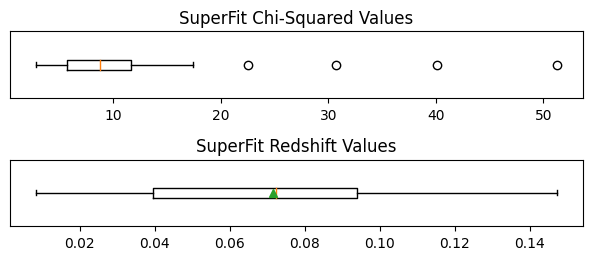

<Figure size 640x480 with 0 Axes>

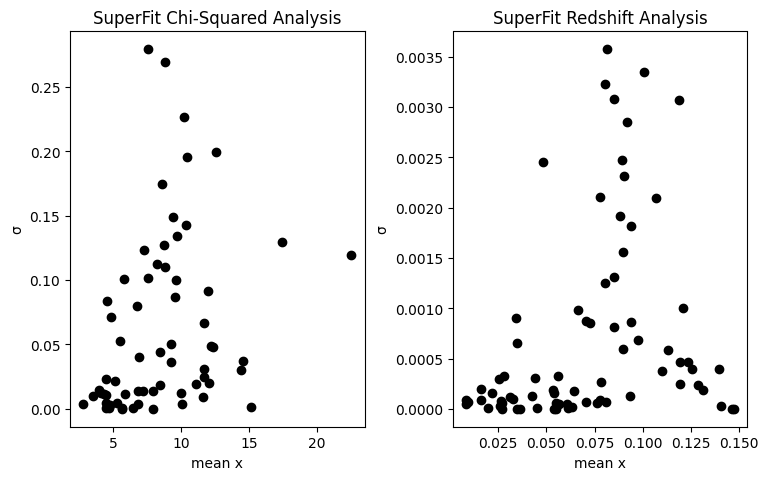

<Figure size 640x480 with 0 Axes>

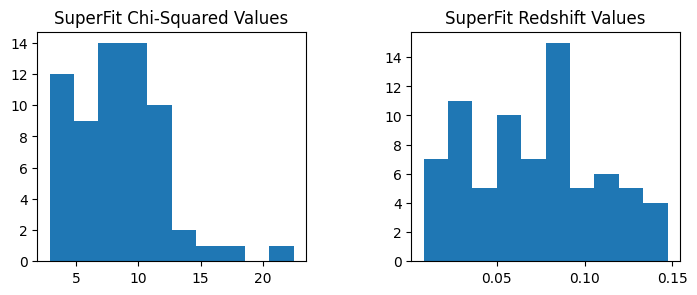

In [154]:
#condensed_data = pd.read_csv(final_path+'SuperFit_Results', sep=';')

#print(condensed_data)

chi2_plot = np.array(list(zip(*condensed_data['CHI2/dof']))[0])
z_plot = np.array(list(zip(*condensed_data['Z']))[0])
chi2_plot_unc = np.array(list(zip(*condensed_data['CHI2/dof']))[1])
z_plot_unc = np.array(list(zip(*condensed_data['Z']))[1])

outlier_chi2_plot = clear_outliers(pd.DataFrame({'Val':chi2_plot, 'Unc':chi2_plot_unc}).dropna(), 'Unc')

plt.figure(1)
figure, axis = plt.subplots(2, 1)
plt.tight_layout(pad=5)
figure.set_figwidth(8)
figure.set_figheight(3)

axis[0].boxplot(chi2_plot, vert=False, showmeans=True)
axis[0].yaxis.set_major_locator(plt.NullLocator())
#axis[0, 0].tight_layout(pad=10)
axis[0].set_title("SuperFit Chi-Squared Values")
#plt.savefig('../Report Images/uncut_mean')
#plt.show()

axis[1].boxplot(z_plot, vert=False, showmeans=True)
axis[1].yaxis.set_major_locator(plt.NullLocator())
#axis[0, 1].tight_layout(pad=10)
axis[1].set_title("SuperFit Redshift Values")

#plt.savefig('../Report Images/SF_Chi2_BP')
plt.show()

plt.figure(2)
figure, axis = plt.subplots(1, 2)
plt.tight_layout(pad=2)
figure.set_figwidth(8)

axis[0].set_xlabel('mean x')
axis[0].set_ylabel('σ')
axis[0].plot(outlier_chi2_plot['Val'], outlier_chi2_plot['Unc'], 'o', color='black')
#axis[0, 0].tight_layout(pad=10)
axis[0].set_title("SuperFit Chi-Squared Analysis")
#plt.show()

axis[1].set_xlabel('mean x')
axis[1].set_ylabel('σ')
axis[1].plot(z_plot, z_plot_unc, 'o', color='black')
#axis[0, 1].tight_layout(pad=10)
axis[1].set_title("SuperFit Redshift Analysis")

#plt.savefig('../Report Images/SF_Chi2_CH')
plt.show()

plt.figure(3)
figure, axis = plt.subplots(1, 2)
plt.tight_layout(pad=3)
figure.set_figwidth(8)
figure.set_figheight(3)

axis[0].hist(outlier_chi2_plot['Val'])
axis[0].set_title("SuperFit Chi-Squared Values")

axis[1].hist(z_plot)
axis[1].set_title("SuperFit Redshift Values")
plt.savefig('../Report Images/SF_Chi2_Hist')
plt.show()

## SNID

In [88]:
# Retrieve the output files and compile into table similar to SuperFit
# Assumes standardised format of output files

def read_snid_info(file_name):
    redshift = ()
    age = ()
    subtypes = []
    objects = []

    with open(snid_path+file_name, "r") as f:
        # Read up until the median redshift and age
        line = ""
        while line.strip() != "### median redshift/age and error ###":
            line = f.readline()
            if not line:
                break
            #print(line.strip())
    
        # Get the median Age and Redshift
        redshift = tuple([float(i) for i in f.readline().strip().split()[1:]])
        age = tuple([float(i) for i in f.readline().strip().split()[1:]])
    
        # Continue reading until subtype analysis
        while line.strip() != "### type fraction/redshift/age ###":
            line = f.readline()
            if not line:
                break
            #print(line.strip())
    
        # Gather subtypes
        subtypes = [f.readline().strip().split("#")[1].split()]
        while line.strip() != "":
            line = f.readline()
            if not line:
                break
            subtype = line.strip().split()
            if len(subtype) > 1:
                subtypes.append([subtype[0]]+[int(subtype[1])]+[float(i) for i in subtype[2:]])
        
        subtypes = pd.DataFrame(data=subtypes[1:], columns=subtypes[0])
        #print(subtypes)
        
        # Continue reading until sample list
        while line.strip() != "### rlap-ordered template listings ###":
            line = f.readline()
            if not line:
                break
                
        objects = [f.readline().strip().split("#")[1].split()]
        
        # Get list of objects, up until the rlap cutoff (after which just ignore)
        while line.strip() != "#--- rlap cutoff":
            line = f.readline()
            if not line:
                break
            obj = line.strip().split()
            if len(obj) > 3:
                objects.append(obj[0:3]+[float(i) for i in obj[3:8]]+[int(obj[8]), obj[9]])
        
        objects = pd.DataFrame(data=objects[1:], columns=objects[0])
        
        return redshift, age, subtypes, objects

In [89]:
# Read all files in SNID info directory
snid_files = [f for f in listdir(snid_path) if isfile(join(snid_path, f))]

# List to collect all metadata
metadata = [['file', 'zmed', 'zvar', 'agem', 'agev']]

for file in snid_files:
    if file == "snid.param":
        continue
    redshift, age, subtypes, objs = read_snid_info(file)
    metadata.append([file, *redshift, *age])
    subtypes.to_csv(snid_st_path+file+'.csv', index=False)
    objs.to_csv(snid_obj_path+file+'.csv', index=False)

with open(snid_st_path+'key.csv', "w+") as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(metadata)

print("Transfer complete")

Transfer complete


In [104]:
#redshift, age, subtypes, objs = read_snid_info("T2m3ws-20221104.110100-0036.p12_SN_snid.output")
#OBK-12032-WiFeS-Splice-UT20220614T122234-1.p12_SN_snid.output
#T2m3ws-20221104.110100-0036.p12_SN_snid.output

def condense_SNID(file):
    redshift, age, subtypes, objs = read_snid_info(file)
    
    # Filter the subtypes to include only the top 5
    top5 = [0, 0, 0, 0, 0]
    for ntemp in subtypes['ntemp']:
        flag = False
        for val in top5:
            flag = flag or val < ntemp
        if flag:
            top5.append(int(ntemp))
            top5 = list(np.sort(top5))
            top5.pop(0)
            
    # Top 5 also includes a redundancy but this is good
    # as we want it to say the results are crappy if the
    # top 5 results are all collations.
    trimmed_subtypes = subtypes[subtypes['ntemp'] >= top5[0]]
    #display(trimmed_subtypes)

    # Conduct a modal analysis on rlap by iterating through the subtypes directory to get an rlap

    # Remove bad grades from the dataframe
    trimmed_objs = objs[objs['grade'] == 'good']
    #display(trimmed_objs)
    subtype = chi2_weighted_mode([trimmed_objs['type']], [trimmed_objs['rlap']], rlap=True)
    
    def addUncs(final_type):
        average_rlap = np.mean(trimmed_objs[trimmed_objs['type'] == subtype[0]]['rlap'])
        final_type = final_type.assign(avg_rlap=[average_rlap])
        final_type = final_type.assign(wmode=[subtype[1]])
        return final_type

    if subtype[0] in trimmed_subtypes['type'].values:
        final_type = trimmed_subtypes[trimmed_subtypes['type'] == subtype[0]]
        final_type = addUncs(final_type)
        final_type = final_type.assign(wmode_agreement=[True])
    else:
        final_type = subtypes[subtypes['type'] == subtype[0]]
        final_type = addUncs(final_type)
        final_type = final_type.assign(wmode_agreement=[False])
    
    return final_type

In [107]:
#condense_SNID("T2m3ws-20221104.110100-0036.p12_SN_snid.output")

# Read all files in SNID info directory
snid_files = [f for f in listdir(snid_path) if isfile(join(snid_path, f))]

# Create an empty dataframe
SNID_output = pd.DataFrame()

for file in snid_files:
    if file == "snid.param": continue
        
    SNE = condense_SNID(file)
    SNE.insert(0, "Object", [file[:-12]], True)
    
    SNID_output = pd.concat([SNE,SNID_output.loc[:]]).reset_index(drop=True) #SNID_output.append(SNE, ignore_index=True)

# Save to CSV
SNID_output.to_csv(final_path+'SNID_Results', sep=';', index=False)

SNID_output.style

,Object,type,ntemp,fraction,slope,redshift,redshift_error,age,age_error,avg_rlap,wmode,wmode_agreement
0,T2m3ws-20210914.162000-0184.p12_SN,Ib-norm,1,1.000000,0.000000,0.056600,0.000000,40.100000,0.000000,5.190000,1.000000,True
1,T2m3ws-20211008.175054-0082.p12_SN,Ia-norm,66,0.540000,0.046100,0.045300,0.002200,27.150000,5.250000,6.244697,0.539661,True
2,T2m3ws-20210914.183939-0190.p12_SN,M-star,2,1.000000,0.000000,0.062000,0.000400,0.000000,0.000000,5.450000,1.000000,True
3,T2m3ws-20210922.174228-0010.p12_SN,Ia-norm,360,0.870000,-0.015500,0.036000,0.005200,-0.050000,4.877000,6.821556,0.874624,True
4,T2m3ws-20210922.150706-0003.p12_SN,IIP,16,0.550000,0.348300,0.030900,0.001100,239.800000,86.332000,5.956250,0.577961,True
5,T2m3ws-20211214.124728-0063.p12_SN,Ia-norm,565,0.760000,0.014200,0.045600,0.004900,12.800000,22.530000,8.646796,0.792165,True
6,T2m3ws-20221104.110100-0036.p12_SN,Ia-norm,93,0.910000,0.088200,0.032600,0.007300,-0.200000,5.738000,5.513226,0.911455,True
7,T2m3ws-20220917.182413-0251.p12_SN,Ia-91T,31,0.500000,0.069200,0.065600,0.002400,-2.100000,4.744000,5.966129,0.505563,True
8,T2m3ws-20220718.104325-0330.p12_SN,Ic-broad,4,0.290000,0.214300,0.029000,0.002500,11.150000,3.156000,5.415000,0.286129,True
9,T2m3ws-20220509.160759-0079.p12_SN,Ia-norm,642,0.820000,0.048900,0.382400,0.005300,1.250000,16.397000,2.379626,0.848979,True


<Figure size 640x480 with 0 Axes>

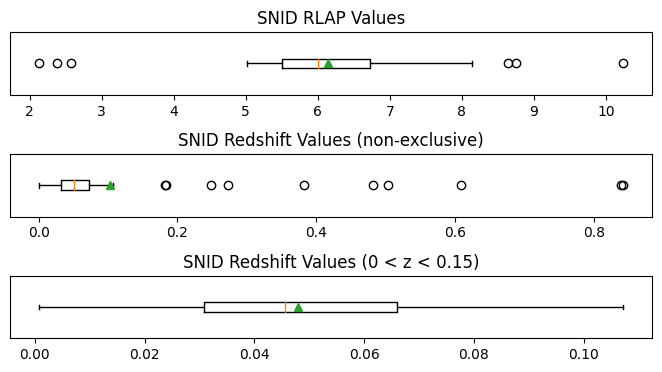

<Figure size 640x480 with 0 Axes>

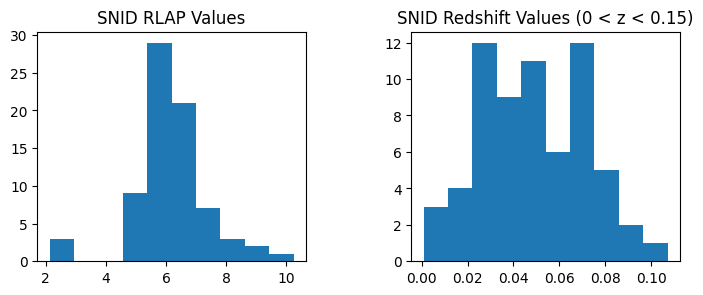

In [156]:
condensed_data = SNID_output

chi2_plot = np.array(list(condensed_data['avg_rlap']))
z_plot = np.array(list(condensed_data['redshift']))
chi2_plot_unc = np.array(list(condensed_data['wmode']))
z_plot_unc = chi2_plot #np.array(list(condensed_data['redshift_error']))

outlier_chi2_plot = clear_outliers(pd.DataFrame({'Val':chi2_plot, 'Unc':chi2_plot_unc}).dropna(), 'Unc')

plt.figure(1)
figure, axis = plt.subplots(3, 1)
plt.tight_layout(pad=3)
figure.set_figwidth(8)
figure.set_figheight(4)

axis[0].boxplot(chi2_plot, vert=False, showmeans=True)
axis[0].yaxis.set_major_locator(plt.NullLocator())
#axis[0, 0].tight_layout(pad=10)
axis[0].set_title("SNID RLAP Values")
#plt.savefig('../Report Images/uncut_mean')
#plt.show()

axis[1].boxplot(z_plot, vert=False, showmeans=True)
axis[1].yaxis.set_major_locator(plt.NullLocator())
#axis[0, 1].tight_layout(pad=10)
axis[1].set_title("SNID Redshift Values (non-exclusive)")

z_plot_in_range = list(filter(lambda z: z <= 0.15, z_plot))

axis[2].boxplot(z_plot_in_range, vert=False, showmeans=True)
axis[2].yaxis.set_major_locator(plt.NullLocator())
#axis[0, 1].tight_layout(pad=10)
axis[2].set_title("SNID Redshift Values (0 < z < 0.15)")

#plt.savefig('../Report Images/SNID_BP')
plt.show()

plt.figure(2)
figure, axis = plt.subplots(1, 2)
plt.tight_layout(pad=3)
figure.set_figwidth(8)
figure.set_figheight(3)

axis[0].hist(chi2_plot)
axis[0].set_title("SNID RLAP Values")

axis[1].hist(z_plot_in_range)
axis[1].set_title("SNID Redshift Values (0 < z < 0.15)")
plt.savefig('../Report Images/SNID_Hist')
plt.show()

## Combination

Combine the SNR, SuperFit, SNID, and Human Analysis into one Portfolio

In [17]:
files = [f for f in listdir(csv_path) if isfile(join(csv_path, f))]

# Convert a single-page pdf to jpeg
def convert_single_pdf_to_image(origin, destination):
    pages = convert_from_path(origin, 500)
    for count, page in enumerate(pages):
        page.save(destination, 'JPEG')
        break
    
for file in files:
    if file == 'key.csv': continue
    convert_single_pdf_to_image(sf_pdf_path+file[:-4]+'_0.pdf', sf_img_path+file[:-4]+'.jpg')

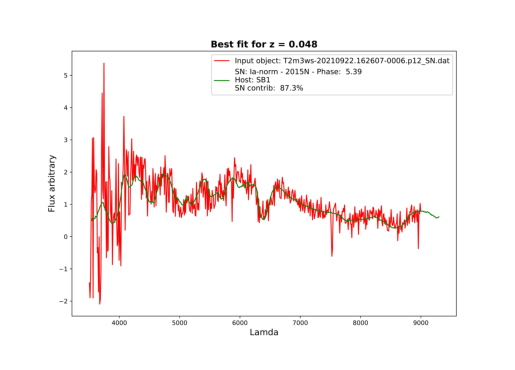

In [24]:
# Display an image using matplotlib
def display_image(title, file):
    plt.title(title)
    plt.axis('off')
    image = mpimg.imread(file)
    plt.imshow(image)

plt.figure(1)
display_image("", sf_img_path+"T2m3ws-20210922.162607-0006.p12_SN.jpg")
plt.show()

OBJECT PORTFOLIO

Object Name: OBK-112832-WiFeS-Splice-UT20221010T114426-8.p12_SN
Object File: OBK-112832-WiFeS-Splice-UT20221010T114426-8.p12_SN
Date:        11/10/2022
Pipeline:    v01
Metadata:    m01

=== Uncut SNR Information ===
Mean SNR:     32.635755504917874
Median SNR:   33.53544762155344
SNR Variance: 169.9529049432371

=== Cut SNR Information ===
Mean SNR:     37.54787882244718
Median SNR:   36.88970499591453
SNR Variance: 106.33877103345824

=== Superfit Results ===


,x̄,σ
Const SN,0.308051,2.268754e-02
Const Gal,0.681676,5.923970e-03
Frac SN,0.139198,8.464857e-03
Frac Gal,0.860802,8.464855e-03
Redshift,0.077600,2.104640e-03
Chi-2/df1,5.318712,4.714510e-03
Chi-2/df2,0.012217,2.244187e-07


=== Superfit Candidate Host Galaxies ===


,Type,WMode
Galactic Type,Starburst,1.000000
Galatic Subtype,SB2,0.599331



=== Superfit Candidate Subtypes ===


,Subtype,A_v,Phase,Chi-2/df1
0,Ia-norm,0.603766,-15.38,5.235990
1,Ia-norm,2.000000,6.24,5.235144



=== SNID Candidate Subtypes ===


,type,ntemp,fraction,slope,redshift,redshift_error,age,age_error,avg_rlap,wmode,wmode_agreement
0,Ia-norm,513,0.9,0.0202,0.0235,0.0054,-1.3,4.528,6.811676,0.90811,True



=== SuperFit Best Fit ===


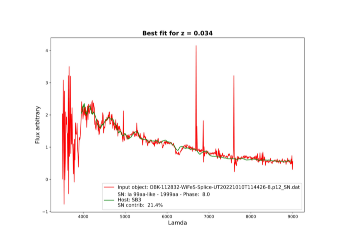


=== Spectral Features ===


<Figure size 640x480 with 0 Axes>

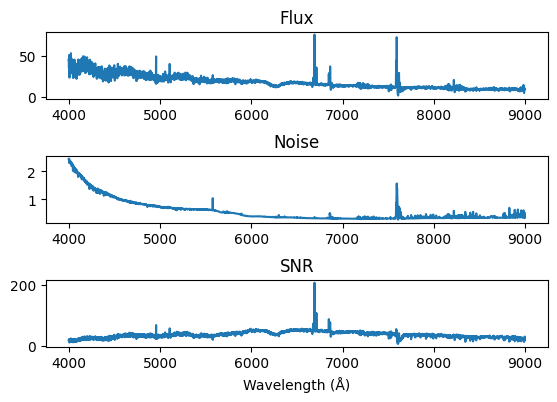

In [118]:
def single_object_portfolio(obj_name, lower_cut=4000):
    obj = obj_name # Convert this into a File <=> Name transfer
    
    print("OBJECT PORTFOLIO\n")
    
    # Show SNR Data/Metadata, use file name as indexer
    SNR = pd.read_csv(snr_path+'key.csv', index_col=0)
    SNR_cut = pd.read_csv(cut_snr_path+'key.csv', index_col=0)
    
    print(
        "Object Name: " + obj_name + "\n" +
        "Object File: " + obj + "\n" +
        "Date:        " + SNR['date'][obj] + "\n" +
        "Pipeline:    " + SNR['pipeline'][obj] + "\n" +
        "Metadata:    " + SNR['metadata'][obj] + "\n"
         )
    
    print(
        "=== Uncut SNR Information ===" + "\n" +
        "Mean SNR:     " + str(SNR['SNR_mean'][obj]) + "\n" +
        "Median SNR:   " + str(SNR['SNR_median'][obj]) + "\n" +
        "SNR Variance: " + str(SNR['SNR_var'][obj]) + "\n\n" +
        "=== Cut SNR Information ===" + "\n" +
        "Mean SNR:     " + str(SNR_cut['SNR_mean'][obj]) + "\n" +
        "Median SNR:   " + str(SNR_cut['SNR_median'][obj]) + "\n" +
        "SNR Variance: " + str(SNR_cut['SNR_var'][obj]) + "\n"
         )
    
    # Show results of SuperFit
    SF = pd.read_csv(final_path+'SuperFit_Results', index_col=0, delimiter=';')
    obj = obj + '_binned.txt'
    
    print("=== Superfit Results ===")
    
    list_singles = [
        SF['CONST_SN'][obj],
        SF['CONST_GAL'][obj],
        SF['Frac(SN)'][obj],
        SF['Frac(gal)'][obj],
        SF['Z'][obj],
        SF['CHI2/dof'][obj],
        SF['CHI2/dof2'][obj]
    ]
    
    display(pd.DataFrame(
        index=[
            'Const SN',
            'Const Gal',
            'Frac SN',
            'Frac Gal',
            'Redshift',
            'Chi-2/df1',
            'Chi-2/df2'
        ],
        data={
            'x̄': list(map(lambda x: ast.literal_eval(x)[0], list_singles)),
            'σ': list(map(lambda x: ast.literal_eval(x)[1], list_singles))
        }
    ))
    
    print("=== Superfit Candidate Host Galaxies ===")
    SF_galaxy = ast.literal_eval(SF['GALAXY'][obj])
    display(pd.DataFrame(
        index=[
            'Galactic Type',
            'Galatic Subtype'
        ],
        data={
            'Type': [SF_galaxy[0][0], SF_galaxy[1][0]],
            'WMode': [SF_galaxy[0][1], SF_galaxy[1][1]]
        }
    ))
    
    print("\n=== Superfit Candidate Subtypes ===")
    
    list_singles = [
        list(map(lambda x: x.split('/')[0], ast.literal_eval(SF['SN'][obj]))),
        ast.literal_eval(SF['A_v'][obj]),
        ast.literal_eval(SF['Phase'][obj]),
        ast.literal_eval(SF['CHI2'][obj])
    ]
    
    display(pd.DataFrame(
        columns=[
            'Subtype',
            'A_v',
            'Phase',
            'Chi-2/df1'
        ],
        data=list(reversed(list(zip(*list_singles))))
    ))
    
    obj = obj[:-11]
    
    # Show results of SNID
    SNID = pd.read_csv(final_path+'SNID_Results', index_col=0, delimiter=';')
    print("\n=== SNID Candidate Subtypes ===")
    display(pd.DataFrame(SNID.loc[obj,:]).T.reset_index(drop=True))
    
    # SuperFit Best Fit
    print("\n=== SuperFit Best Fit ===")
    figure = plt.figure(1)
    figure.set_figheight(3)
    display_image("", sf_img_path+obj+".jpg")
    plt.show()
    
    
    # Show Spectra
    print("\n=== Spectral Features ===")
    plt.figure(2)
    display_spectra(obj+'.csv', lower_cut, figsize=(6, 4))
    plt.show()
    
single_object_portfolio("OBK-112832-WiFeS-Splice-UT20221010T114426-8.p12_SN")

## Uniformity_Analysis

In [42]:
z_vals = np.random.uniform(0, 1, 100)

print(np.var(z_vals))

print((max(z_vals) - min(z_vals))**2 / 12)

0.09798068326567304
0.08291958680837537


### Kolmogorov-Smirnov test

For a random sample variable X:

$F_n(x) = \frac{n(X < x)}{n} = \frac{1}{n} \sum^{n}_{i=1} 1_{\left(-\infty,x\right]}(X_i)$

F(x) is the CDF of a uniform distribution.

$D = sup|F_n(x)-F(x)|$

The Kolomogrov Distribution is:

$P(K\leq x) = \frac{\sqrt{2\pi}}{x}\sum^{\infty}_{k=1} \exp{\left(-\frac{(2k-1)^2 \pi^2}{8 x^2}\right)}$

The null hypothesis is rejected at $\alpha$ when:

$\sqrt{n}D > K_\alpha$ where $P(K \leq K_\alpha) = 1 - \alpha$

Thus the p-value corresponding to an arbitrary statistic is:

$p = 1 - P(K \leq \sqrt{n}D)$

In [169]:
# Performs a Kolmogorov-Smirnov test on a discrete distribution, returning a statistic and a p-value
# Parameters:
#     sample      : a 1-dimensional numpy array containing the samples
#     min_val     : the minimum value of the uniform distribution
#     max_val     : the minimum value of the uniform distribution
#     test_points : the amount of points to create in the x-linspace for the function x
#     KS_dist_acc : the accuracy (sum count) of the determined Kolmogorov distribution
#     graph       : plot the two CDFs?
# Returns:
#     D : the Kolmogorov-Smirnov statistic
#     K : the reduced Kolmogorov-Smirnov statistic
#     p : the p-value of the resultant distribution
#
def ks_test(sample, min_val=0, max_val=1, test_points=100, KS_dist_acc=1000, graph=True, name="sample"):
    n = len(sample)
    
    # Empirical distribution function
    def F_n(x):
        total = 0
        for X in sample:
            total = total + int(X <= x)
        return total/n
    
    # Cumulative Distribution Function (Of Uniform Dist.)
    def F(x, a=min_val, b=max_val):
        if x < a: return 0
        elif x < b: return ((x-a)/(b-a))
        else: return 1
    
    # Calculate the CDFs
    xs = np.linspace(min_val, max_val,test_points)

    Fn = np.array(list(map(F_n, xs)))
    Fx = np.array(list(map(F, xs)))
    
    # Plot the two CDFs
    if graph:
        plt.plot(xs, Fn, label="Sample EDF") 
        plt.plot(xs, Fx, label="Uniform CDF")
        plt.title("K-S Test Cumulative Plots for "+name)
        plt.xlabel("z")
        plt.ylabel("Cumulative freq.")
        plt.legend()
    
    # Using max instead of supremum doesn't matter because real numbers
    D = max(abs(Fn-Fx))
    
    # With the statistic find the p-value
    K = np.sqrt(n)*D
    
    # Calculate the KS distribution to some accuracy
    def ks_dist(x, iterations=KS_dist_acc):
        total = 0
        for k in range(1,iterations+1):
            total = total + np.exp(- (2*k-1)**2 * np.pi**2 / (8 * x ** 2))
        total = total * np.sqrt(2*np.pi) / x
        return total
    
    # Calculate p-value
    p = 1 - ks_dist(K)
    
    return D, K, p

10
11
13
16
19
22
26
31
37
43
51
61
71
84
100
117
138
163
193
227
268
316
372
439
517
610
719
848
1000
1178
1389
1637
1930
2275
2682
3162
3727
4393
5179
6105
7196
8483
10000
11787
13894
16378
19306
22758
26826
31622


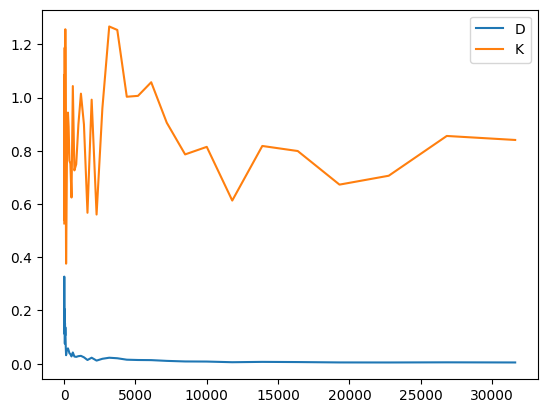

In [125]:
# Check which statistic is appropriately reduced 

sizes = []
Ds = []
Ks = []
ps = []

#print(np.logspace(1, 4, 50))

for size in np.logspace(1, 4.5, 50):
    s = int(size)
    print(s)
    z_vals = np.random.uniform(0, 1, s)

    #print(z_vals)
    D, K, p = ks_test(z_vals, max_val=max(z_vals), test_points=s, graph=False)

    sizes.append(s)
    Ds.append(D)
    Ks.append(K)
    ps.append(1-p)
    
    #print("size=",s, D, K, 1-p)

plt.plot(sizes, Ds, label="D")
plt.plot(sizes, Ks, label="K")
plt.legend()
plt.show()

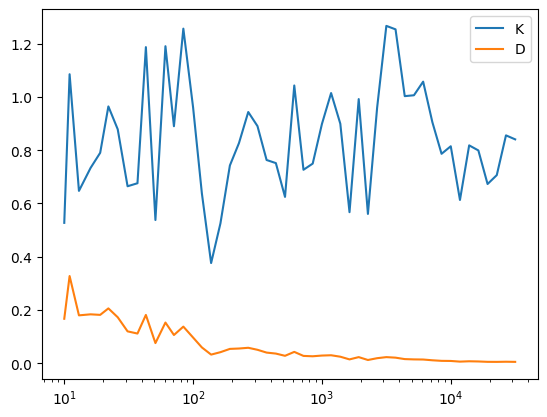

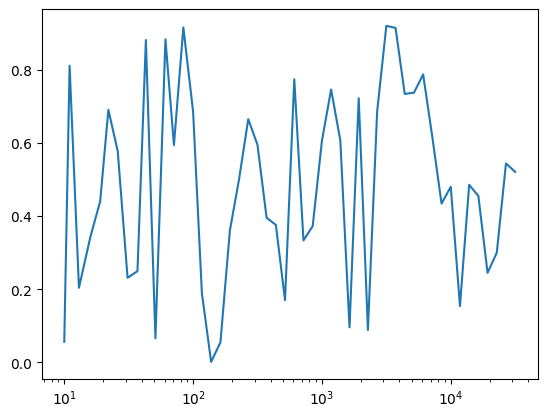

In [130]:
plt.semilogx(sizes, Ks, label="K")
plt.semilogx(sizes, Ds, label="D")
plt.legend()
plt.show()
plt.semilogx(sizes, ps, label="p")
plt.show()

0.1465706570657066 1.2693391246827905 0.920289963048987


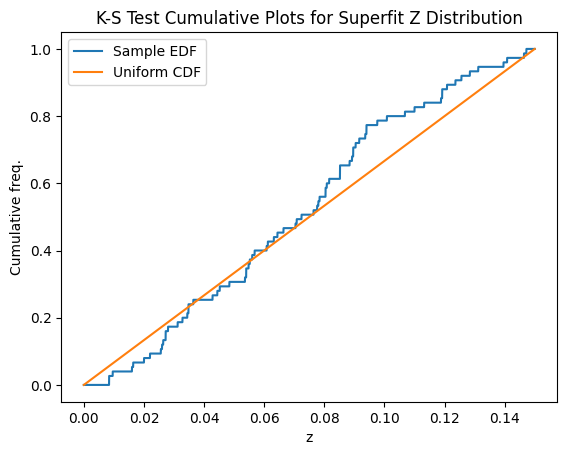

In [174]:
# Run the KS-Test on the redshift distribution

# Superfit Redshifts
plt.figure(3)
condensed_data = pd.read_csv(final_path+'SuperFit_Results', sep=';')
Zs = list(map(lambda x: ast.literal_eval(x)[0], condensed_data['Z']))
D, K, p = ks_test(Zs, max_val=0.15, test_points=10000, KS_dist_acc=100000, name="Superfit Z Distribution")
print(D, K, 1-p)
plt.savefig('../Report Images/SF_K-S')
plt.show()

0.28928092809280925 2.505246325587123 0.9999929280275137


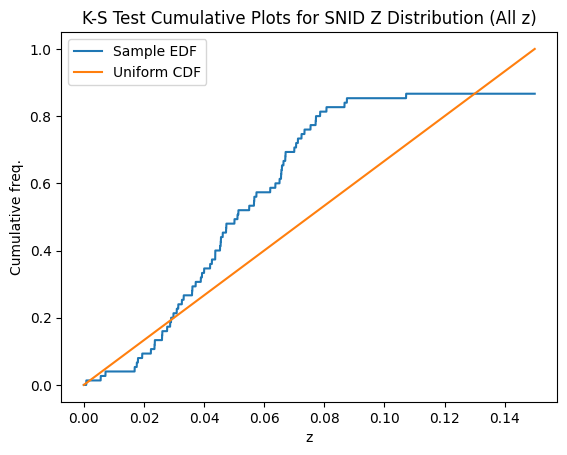

0.41579234846561586 3.3522250831001617 0.9999999996529941


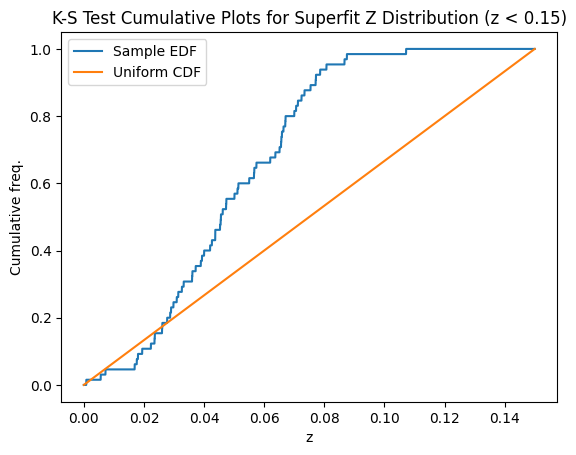

In [175]:
# SNID (Non-Cut) Redshifts
plt.figure(1)
condensed_data = pd.read_csv(final_path+'SNID_Results', sep=';')
Zs = condensed_data['redshift']
D, K, p = ks_test(Zs, max_val=0.15, test_points=10000, KS_dist_acc=100000, name="SNID Z Distribution (All z)")
print(D, K, 1-p)
plt.savefig('../Report Images/SNID_All-z_K-S')
plt.show()

# SNID (Non-Cut) Redshifts
plt.figure(2)
Zs = condensed_data[condensed_data['redshift'] <= 0.15]['redshift']
D, K, p = ks_test(Zs, max_val=0.15, test_points=10000, KS_dist_acc=100000, name="Superfit Z Distribution (z < 0.15)")
print(D, K, 1-p)
plt.savefig('../Report Images/SNID_cut-z_K-S')
plt.show()

SNID looks more like a normal distribution (null hypothesis rejected); Superfit looks more uniform (null hypothesis not rejected).